# Bundling itch.io Popular Products with K-means Clustering

## Goal

Itch.io is a widely popular online marketplace that specializes in independent video and tabletop games. The indie specialization brings up an unique,Itch.io is a widely popular online marketplace that specializes in independent video and tabletop games. The indie specialization brings up a unique, diverse catalog for the itch.io marketplace. But due to their uniqueness, itch.io's product catalog can be hard to categorize for further market research needs. This project aims to categorize itch.io listings through clustering in order to gain insights on product categories and their market performance. diverse catalog for the itch.io marketplace. Things brings up a challenge to categorize itch.io listings for further market analysis. This project aims to categorize each product in itch.io listings through clustering techniques.  

## Setup

### Loading packages

In [98]:
## Load Packages

# Pandas (Table)
import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np

# Plot visualization
import matplotlib.pyplot as plt
import seaborn as sns

# File Path Load
from pathlib import Path
import csv

# Date 
from datetime import datetime as dt

## Data Preparation

### Importing dataset

In [99]:
## Path load
path = Path("C:/Users/****")

df = pd.read_csv(path / "Itch.io Popular Pages.csv", encoding="unicode_escape", delimiter=";")

df2 = pd.read_csv(path / "1500 games.csv")

## Checking
df

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tool,Tags
0,Friday Night Funkin',The coolest rhythm game,$0,ninjamuffin99,"94,35021",10011,Rhythm,https://ninja-muffin24.itch.io/funkin,"Windows, macOS, Linux, HTML5",Unknown,"OpenFL, IndieCade, Haxe",2D
1,Sort the Court!,"Give your decree in simple yes or no answers, ...",$0,Graeme Borland,"94,08258",6709,Simulation,https://graebor.itch.io/sort-the-court,"Windows, macOS, Linux, HTML5",English,Unity,"Cute, Ludum Dare 34"
2,We Become What We Behold,"a game about news cycles, vicious cycles, infi...",$0,Nicky Case!,"95,42467",4839,Unknown,https://ncase.itch.io/wbwwb,HTML5,English,PixiJS,"Comedy, Dark Humor, Experimental"
3,HoloCure,"A 'survivors' like, free unofficial Hololive f...",$0,Kay Yu,"98,84398",4775,Action,https://kay-yu.itch.io/holocure,Windows,"English, Japanese",GameMaker: Studio,"Fangame, hololive, Pixel Art, Roguelite, Singl..."
4,?Our Life: Beginnings & Always,Grow from childhood to adulthood with the lone...,$0,GBPatch,"98,92411",4480,Visual Novel,https://gbpatch.itch.io/our-life,"Windows, macOS, Linux, Android",Unknown,Unknown,"amare, Comedy, Dating Sim, Gay, LGBT, Meaningf..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9121,Zapatron,Retro twin-stick shooter,$0,Ben James,"86,66667",6,Action,https://benjames171.itch.io/zapatron,HTML5,Unknown,Defold,"2D, Pixel Art, Retro, Short, Singleplayer, Twi..."
9122,Pixel Soldier (original jam version),Shoot and dash your way through frantic bossfi...,$0,Accidently Awesome,90,6,Action,https://accidentlyawesome.itch.io/pixel-soldier,"Windows, macOS, Linux, HTML5",Unknown,libGDX,"2D, austria, Boss battle, Fast-Paced, libGDX, ..."
9123,Xmasss Terror,Help Santa to collect lost presents.,$0,zgacesa2,"93,33333",6,Shooter,https://zgacesa2.itch.io/xmass-terror,"Windows, Linux",English,Unity,"3D, Christmas, Endless, Fast-Paced, Low-poly, ..."
9124,Planet Boom,Chaotic planetary defense game,$0,daichifob,"93,33333",6,Shooter,https://daichifob.itch.io/planet-boom-demo,HTML5,Unknown,Unknown,"2D, Arcade, Godot, Pixel Art, Roguelite, Shoot..."


### Data types Checking

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9126 entries, 0 to 9125
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          9126 non-null   object
 1   Description   9126 non-null   object
 2   Price         9126 non-null   object
 3   Author        9126 non-null   object
 4   Rated         9126 non-null   object
 5   RatingNumber  9126 non-null   int64 
 6   Genre         9126 non-null   object
 7   Link          9126 non-null   object
 8   Platforms     9126 non-null   object
 9   Languages     9126 non-null   object
 10  Tool          9126 non-null   object
 11  Tags          9126 non-null   object
dtypes: int64(1), object(11)
memory usage: 855.7+ KB


NotesThere is no column with null entry.

In [101]:
df.sample(2)

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tool,Tags
7854,Super Gigadroid,A metroidvania action adventure game that will...,$0,ASECC,80,8,Platformer,https://asecc.itch.io/super-gigadroid,"Windows, macOS, Linux",Unknown,Unknown,"Difficult, Metroidvania, Pixel Art, Remake, Re..."
999,Little Chef,A fun and cute 2D physics-based cooking game w...,$0,Julien,"94,93827",162,Simulation,https://truebiger.itch.io/little-chef,HTML5,Unknown,"Adobe Illustrator, Unity","2D, Asset Pack, cooking, Cozy, Cute, discovery..."


### Variables Format Checking

In [102]:
## Change object to int64

# Replace , with .
df["Rated"] = df["Rated"].str.replace(",",".")

# Convert to float
df["Rated"] = df["Rated"].astype(str).astype(float)

In [103]:
## Extract currency

df["Currency"] = df["Price"].str.extract(r'([^\d.,]+)', expand=False)

df['Price'] = df['Price'].str.replace(r'[^\d.,]', '', regex=True)

## Price conversion to float
df["Price"] = df["Price"].astype(str).astype(float)

Notes: 
- The currency column has entries with incosistent formating. 

In [104]:
df.sample(3)

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tool,Tags,Currency
4134,Knightin'+ Demo,An extended adventure of the brave knight!,0.00,Wolod,93.57143,28,Adventure,https://wolod.itch.io/knightin-plus-demo,"Windows, macOS, Linux, HTML5",Unknown,Construct,"2D, Controller, Cute, Dungeon Crawler, Explora...",$
352,Changeling,An Urban Fantasy visual novel that explores ro...,19.99,Steamberry Studio,93.28084,381,Visual Novel,https://steamberry.itch.io/changeling,"Windows, macOS",Unknown,Unknown,"amare, Dating Sim, Female Protagonist, Magic, ...",$
6346,Bond: Wish of the Forest,A creature collector roguelite about fighting ...,0.00,Apple Farm Games,80.00000,13,Action,https://apple-farm-games.itch.io/bond-wish-of-...,"Windows, macOS",Unknown,"Clip Studio Paint, Blender, Adobe Photoshop, F...","3D, Action-Adventure, Cute, Dungeon Crawler, E...",$


In [105]:
df["Currency"].unique()

array(['$', '\x80', '£'], dtype=object)

Notes: 
- What is '\x80'?

In [106]:
df[df["Currency"]=="\x80"]

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tool,Tags,Currency
192,The Backrooms 1998 - Found Footage Backrooms S...,The Backrooms 1998,9.99,Steelkrill Studio,98.65093,593,Survival,https://steelkrill.itch.io/the-backrooms-1998-...,Unknown,English,Unknown,"backroom, backrooms, found-footage-games, Horr...",
1562,Galactic Wars,a 8bit Space shooter in Pico 8,2.00,Volcano Bytes,90.19231,104,Shooter,https://volcanobytes.itch.io/galactic-wars,"Windows, macOS, Linux, HTML5",Unknown,PICO-8,"1GAM, 8-Bit, Arcade, html5, PICO-8, Pixel Art,...",
3185,Last Knight: Rogue Rider Edition,Last Knight is over-the-top jousting action in...,5.99,Toco Games,66.66667,42,Action,https://tocogames.itch.io/last-knight,"Windows, macOS",Unknown,Unknown,"Fantasy, jousting, Roguelike",
3303,Alisa,Accurate Late-90s horror themed action adventure,15.00,Casper Croes,90.76923,39,Action,https://caspercroes.itch.io/alisa,"Windows, macOS, Linux",Unknown,Unknown,"3D, 90s, Female Protagonist, Horror, Low-poly,...",
3474,Invisible Seams,A visual novel about soft fabrics and even sof...,7.00,LadyIcepaw,97.29730,37,Visual Novel,https://ladyicepaw.itch.io/invisible-seams,"Windows, macOS, Linux, Android","German, English","Ren'Py, Paint Tool SAI, Audacity","amare, Cute, Fantasy, Furry, Gay, LGBT, Romanc...",
3545,A Pig Quest,A Commodore 64 Game,9.99,Piggy 18 Team,97.71429,35,Platformer,https://piggy18.itch.io/a-pig-quest,Unknown,Unknown,Unknown,"2D, Commodore 64, Cute, Pixel Art, Retro, Sing...",
3606,Limsod,Limsod is an fps where you have to fight for y...,2.99,LimsodGames,94.70588,34,Shooter,https://limsodgames.itch.io/limsod,Windows,"German, English, Spanish; Castilian, French, I...",Unreal Engine,"FPS, Horror, Open World, Photorealistic, Post-...",
3743,RUN: The world in-between,"A new procedural platformer, in which you have...",9.99,LaTeamRun,93.75000,32,Platformer,https://lateamrun.itch.io/run-the-world-in-bet...,"Windows, macOS, Linux","English, Spanish; Latin America, French, Itali...","Adobe Photoshop, Godot, Aseprite","2D, Dark, Godot, Pixel Art, Procedural Generat...",
3870,Sokogeon,A lowRes Puzzle / Adventure made in Puzzlescript,2.00,Volcano Bytes,89.67742,31,Puzzle,https://volcanobytes.itch.io/sokogeon,"Windows, macOS, Linux, HTML5",Unknown,PuzzleScript,"1GAM, 8-Bit, Dungeon Crawler, low-res, Pixel A...",
4019,Nelly Cootalot: Spoonbeaks Ahoy!,Nelly Cootalot is the stupidly named pirate ad...,2.00,Application Systems Heidelberg,82.75862,29,Adventure,https://ashgames85.itch.io/nelly-cootalot-spoo...,"Windows, macOS, Linux","German, English, Spanish; Castilian, French, P...",Adventure Game Studio,"Comedy, Point & Click",


Notes: 
- From a quick itch.io search, i conclude that "\x80" refers to the euro numeric. 

In [107]:
# Replace "\x80" with £
df["Currency"] = df["Currency"].str.replace("\x80","£")

In [108]:
## Check currency symbol again
df["Currency"].unique()

array(['$', '£'], dtype=object)

In [109]:
## Make a standard dollar price value for euro value

df['S_price'] = df['Price'].where(df['Currency'] == "$", other=(df['Price']*1.1))

In [110]:
## Check Result

df[df["Currency"] == "£"].sample(2)

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tool,Tags,Currency,S_price
3545,A Pig Quest,A Commodore 64 Game,9.99,Piggy 18 Team,97.71429,35,Platformer,https://piggy18.itch.io/a-pig-quest,Unknown,Unknown,Unknown,"2D, Commodore 64, Cute, Pixel Art, Retro, Sing...",£,10.989
6580,Super Dice Man,A bouncy dice platformer,1.99,Elastiskalinjen,86.66667,12,Platformer,https://elastiskalinjen.itch.io/super-dice-man,"Windows, macOS, Linux, HTML5",Unknown,PICO-8,"2D, Cute, Exploration, Metroidvania, PICO-8, R...",£,2.189


### Load the variables as list for further EDA

In [111]:
df.dtypes

Name             object
Description      object
Price           float64
Author           object
Rated           float64
RatingNumber      int64
Genre            object
Link             object
Platforms        object
Languages        object
Tool             object
Tags             object
Currency         object
S_price         float64
dtype: object

In [112]:
## Count columns uniqueness
l = df['Name'].value_counts(normalize=True)*100

print(l)

?                                             0.032873
Heatwave                                      0.032873
BOBA                                          0.021915
fishy                                         0.021915
????                                          0.021915
                                                ...   
RASKOPNIK: The Trench Warrior                 0.010958
I Can Gun                                     0.010958
SPOOK TOWER                                   0.010958
Sketch, Share, Solve                          0.010958
?????????? ???? ?????? ?????????? ????????    0.010958
Name: Name, Length: 9102, dtype: float64


In [113]:
## Name and Id variables
id_vars=["Name","Description","Author","Link"]

In [114]:
cont_vars=["S_price","RatingNumber","Rated"]

In [115]:
## Filter string variables

str_vars = [
    var for var in df.columns if df[var].dtype == "O" and var not in id_vars]

print(f"String Variables: \n{str_vars}", end='')

String Variables: 
['Genre', 'Platforms', 'Languages', 'Tool', 'Tags', 'Currency']

In [116]:
## Filter tags variable 
tag_vars = [
    var for var in str_vars if df[var].str.contains(',').any() ]

print(f"Tag Variables: \n{tag_vars}", end='')

Tag Variables: 
['Platforms', 'Languages', 'Tool', 'Tags']

In [117]:
## Filter categorical vars

cat_vars = [
    var for var in str_vars if df[var].nunique() < 50 and var not in tag_vars]

print(f"Categorical Variables: \n{cat_vars}", end='')

Categorical Variables: 
['Genre', 'Currency']

In [118]:
## Filter numerical variables
num_vars = [
    var for var in df.columns if (df[var].dtype == "int64" or df[var].dtype =="float64") and var not in id_vars]

print(f"Numerical Variables: \n{num_vars}", end='')

Numerical Variables: 
['Price', 'Rated', 'RatingNumber', 'S_price']

In [119]:
## Filter discrete variables 

disc_vars = [
    var for var in num_vars if df[var].nunique() < 20]

print(f"Discrete Variables: \n{disc_vars}", end='')

Discrete Variables: 
[]

There is no discrete variables

In [120]:
## Filter Contrinous Variables 

cont_vars = [
    var for var in num_vars if var not in disc_vars]

print(f"Continous feature: \n{cont_vars}", end='')

Continous feature: 
['Price', 'Rated', 'RatingNumber', 'S_price']

In [121]:
## Remove original Price variable from continous variable

cont_vars.remove("Price")

## Duplicate and Missing Data Checking

### Duplicate Check

In [122]:
## Duplicate check
Duplicated = df[df.duplicated(keep=False)]
Duplicated

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tool,Tags,Currency,S_price


Notes: 
- There is no duplicated entry

In [123]:
## Check missing entry
df.isna().sum()

Name            0
Description     0
Price           0
Author          0
Rated           0
RatingNumber    0
Genre           0
Link            0
Platforms       0
Languages       0
Tool            0
Tags            0
Currency        0
S_price         0
dtype: int64

In [124]:
## Missing netry
missing = df[df.isna().any(axis=1)]

print(missing)

Empty DataFrame
Columns: [Name, Description, Price, Author, Rated, RatingNumber, Genre, Link, Platforms, Languages, Tool, Tags, Currency, S_price]
Index: []


In [125]:
## Null entry
df.isnull().sum()

Name            0
Description     0
Price           0
Author          0
Rated           0
RatingNumber    0
Genre           0
Link            0
Platforms       0
Languages       0
Tool            0
Tags            0
Currency        0
S_price         0
dtype: int64

Notes: 
- No missing entry in variables.

In [126]:
df["Platforms"].nunique

<bound method IndexOpsMixin.nunique of 0         Windows, macOS, Linux, HTML5
1         Windows, macOS, Linux, HTML5
2                                HTML5
3                              Windows
4       Windows, macOS, Linux, Android
                     ...              
9121                             HTML5
9122      Windows, macOS, Linux, HTML5
9123                    Windows, Linux
9124                             HTML5
9125                    Windows, macOS
Name: Platforms, Length: 9126, dtype: object>

## EDA

### Distribution Checking

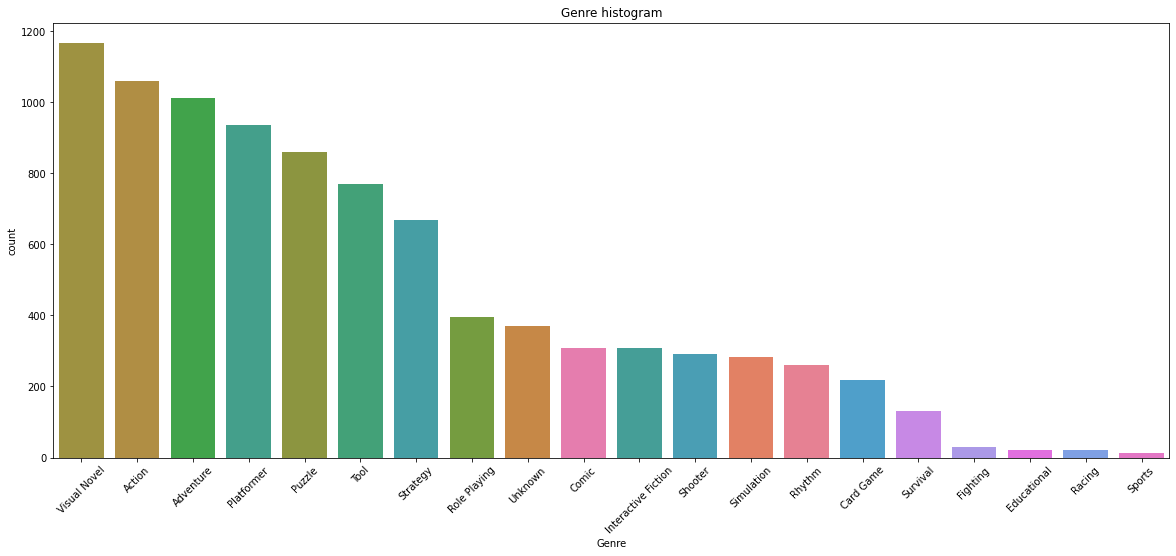

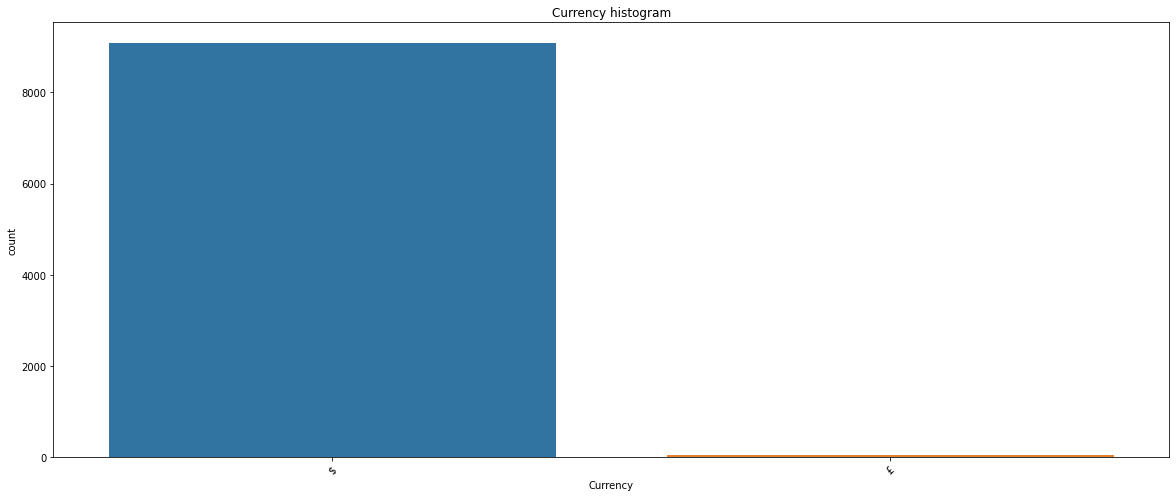

In [127]:
## Check the distribution of every category variables
for var in cat_vars:
    plt.figure(figsize=(20,8))
    sns.countplot(data=df, x=var, hue=var, order = df[var].value_counts().index)
    plt.title(f"{var} histogram")
    if df[var].nunique() > 20:
        plt.xticks([])
    else:
        plt.xticks(rotation=45)
    plt.show

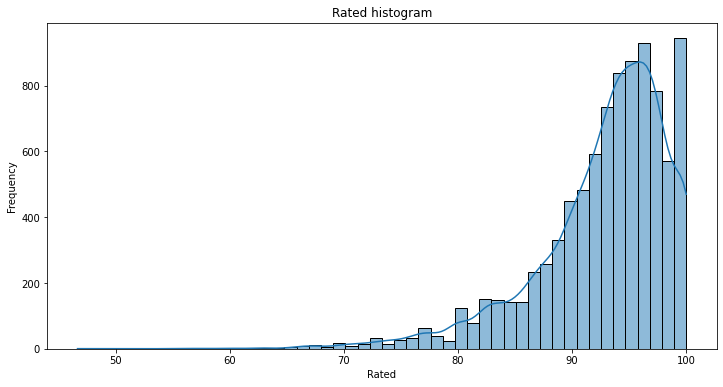

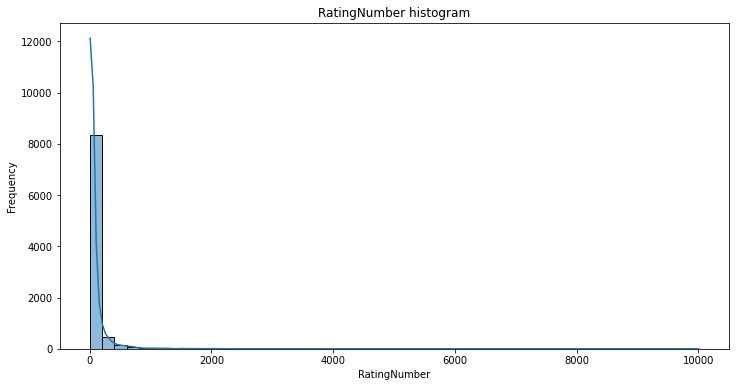

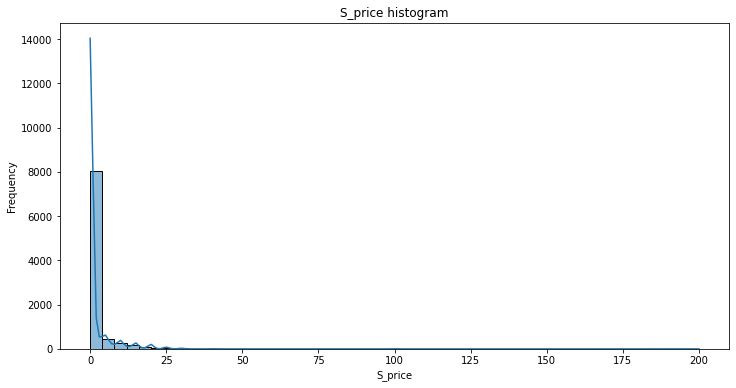

In [128]:
## Check Continous Variables Distribution

for var in cont_vars:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=var, kde=True, bins=50)
    plt.ylabel("Frequency")
    plt.title(f"{var} histogram")
    plt.show()

Notes: 
- Both Rating Number and S_Price have high deviation, which could be caused by outliers. Rating Number represent how many people rated the game, which can indicate an overly popular games. And S_price outliers can be caused by the released of expensive games.
- The outlier is a natural phenomenon and is not caused by data entry or collection error. Thus removing the outlier in this case could lead to inaccurate conclusion. Further steps should be focused on data transformation to handle analytical problem from outliers. 

The data overall have:
- 0 value (free games)
- Non normal distribution 
- Outliers
- Real Numbers (No Negative)

### Data value transformation 

In [129]:
## Load package
from scipy import stats

from sklearn.preprocessing import PowerTransformer

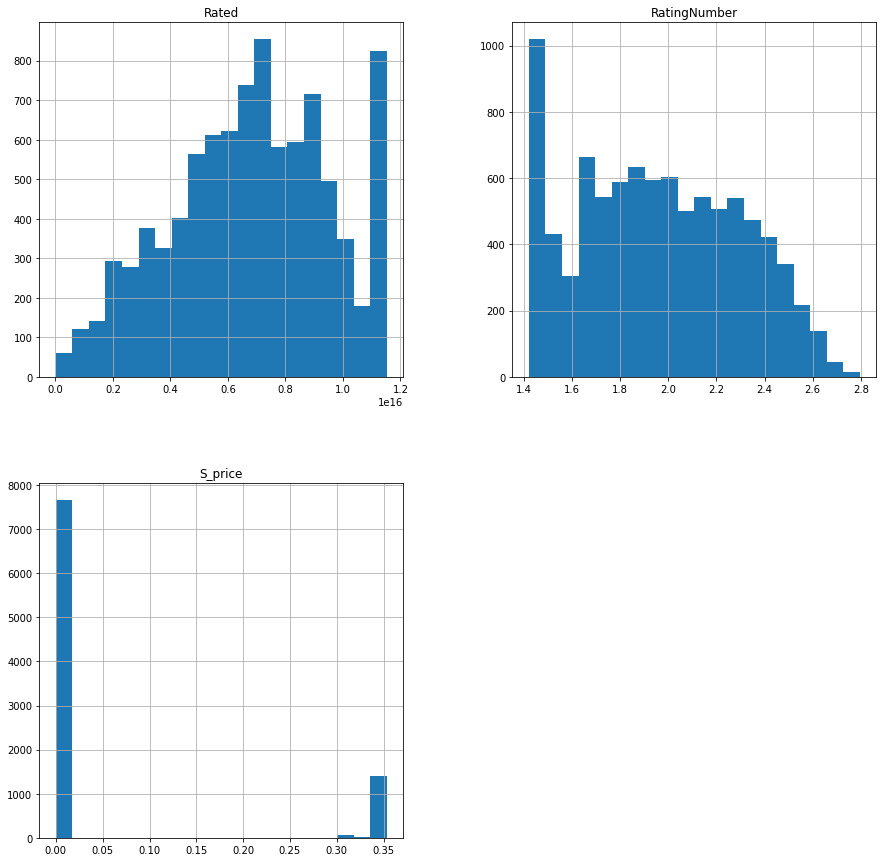

In [130]:
# Yeo Johnson Distribution 
tmp = df.copy()

tmp = tmp[cont_vars]

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=20, figsize=(15,15))
plt.show()

#### What is the most rated genre?

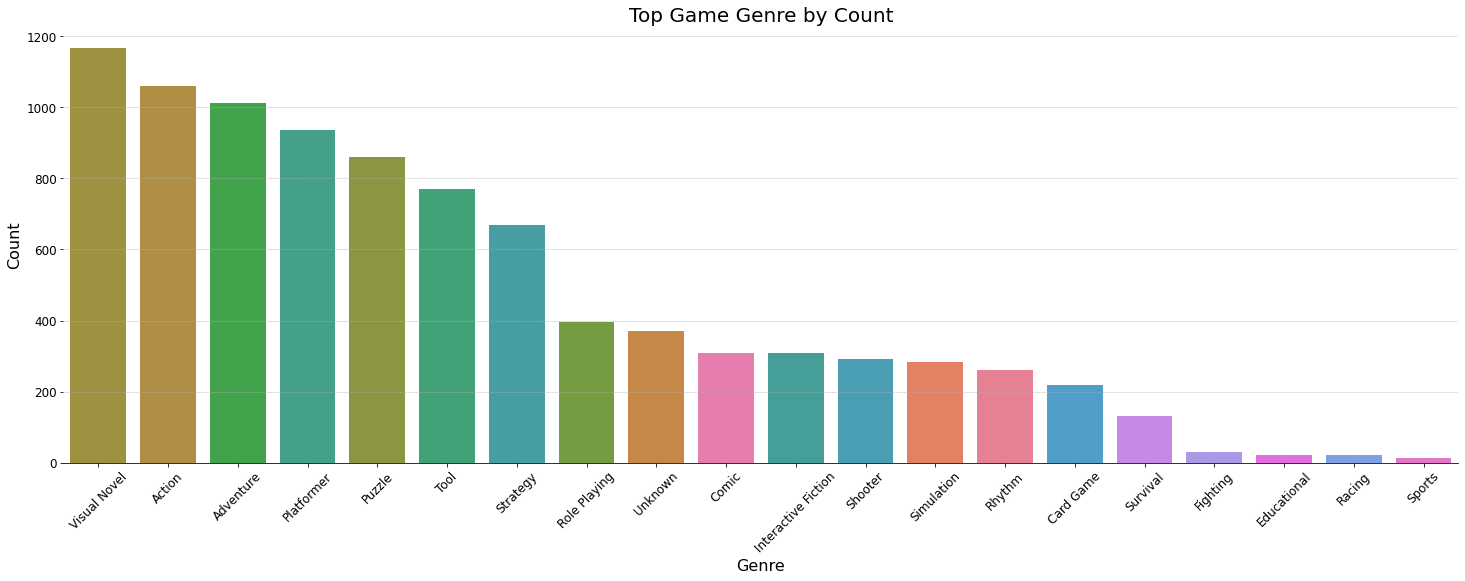

In [238]:
## Plot
fig, ax = plt.subplots(figsize=(25,8), facecolor="white")
sns.countplot(data=df, x="Genre", hue="Genre", order = df["Genre"].value_counts().index)

# Label
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.title("Top Game Genre by Count", fontsize=20)

## Aestethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

# Save
plt.savefig('itch_genre_count.png')

Notes: 
- The top 3 most popular genre are visual novel, action, and adventure. 

In [132]:
df.sort_values(by="RatingNumber", ascending=False).head(20)

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tool,Tags,Currency,S_price
0,Friday Night Funkin',The coolest rhythm game,0.00,ninjamuffin99,94.35021,10011,Rhythm,https://ninja-muffin24.itch.io/funkin,"Windows, macOS, Linux, HTML5",Unknown,"OpenFL, IndieCade, Haxe",2D,$,0.00
1,Sort the Court!,"Give your decree in simple yes or no answers, ...",0.00,Graeme Borland,94.08258,6709,Simulation,https://graebor.itch.io/sort-the-court,"Windows, macOS, Linux, HTML5",English,Unity,"Cute, Ludum Dare 34",$,0.00
2,We Become What We Behold,"a game about news cycles, vicious cycles, infi...",0.00,Nicky Case!,95.42467,4839,Unknown,https://ncase.itch.io/wbwwb,HTML5,English,PixiJS,"Comedy, Dark Humor, Experimental",$,0.00
3,HoloCure,"A 'survivors' like, free unofficial Hololive f...",0.00,Kay Yu,98.84398,4775,Action,https://kay-yu.itch.io/holocure,Windows,"English, Japanese",GameMaker: Studio,"Fangame, hololive, Pixel Art, Roguelite, Singl...",$,0.00
4,?Our Life: Beginnings & Always,Grow from childhood to adulthood with the lone...,0.00,GBPatch,98.92411,4480,Visual Novel,https://gbpatch.itch.io/our-life,"Windows, macOS, Linux, Android",Unknown,Unknown,"amare, Comedy, Dating Sim, Gay, LGBT, Meaningf...",$,0.00
5,Adventures With Anxiety!,An interactive story about anxiety. You play *...,0.00,Nicky Case!,98.07065,4416,Visual Novel,https://ncase.itch.io/anxiety,HTML5,Unknown,Unknown,"Comedy, Mental Health, Narrative",$,0.00
6,Doki Doki Literature Club!,Will you write the way into her heart?,0.00,Team Salvato,96.16588,4220,Visual Novel,https://teamsalvato.itch.io/ddlc,"Windows, macOS, Linux",English,Ren'Py,"Anime, Cute, Horror, Romance",$,0.00
7,Six Cats Under,You died. Your unfinished business? The fate o...,0.00,Team Bean Loop,95.66180,3974,Puzzle,https://teambeanloop.itch.io/six-cats-under,"Windows, macOS, Linux, HTML5",English,"Adobe Photoshop, Unity","2D, Cats, Cute, Ghosts, Narrative, Pixel Art, ...",$,0.00
8,Project Kat,"A small, unconventional horror rpg.",0.00,Leef 6010,96.60664,3943,Role Playing,https://leef6010.itch.io/projectkat,"Windows, macOS, Linux","English, Japanese","Paint Tool SAI, Godot, Aseprite","2D, Anime, Cute, Horror, Pixel Art, RPG Maker,...",$,0.00
9,Butterfly Soup,Gay girls playing baseball and falling in love,0.00,Brianna Lei,97.76702,3717,Visual Novel,https://brianna-lei.itch.io/butterfly-soup,"Windows, macOS, Linux","Czech, English, Persian, Japanese, Korean, Pol...",Ren'Py,"2D, Anime, Female Protagonist, LGBT, Ren'Py, R...",$,0.00


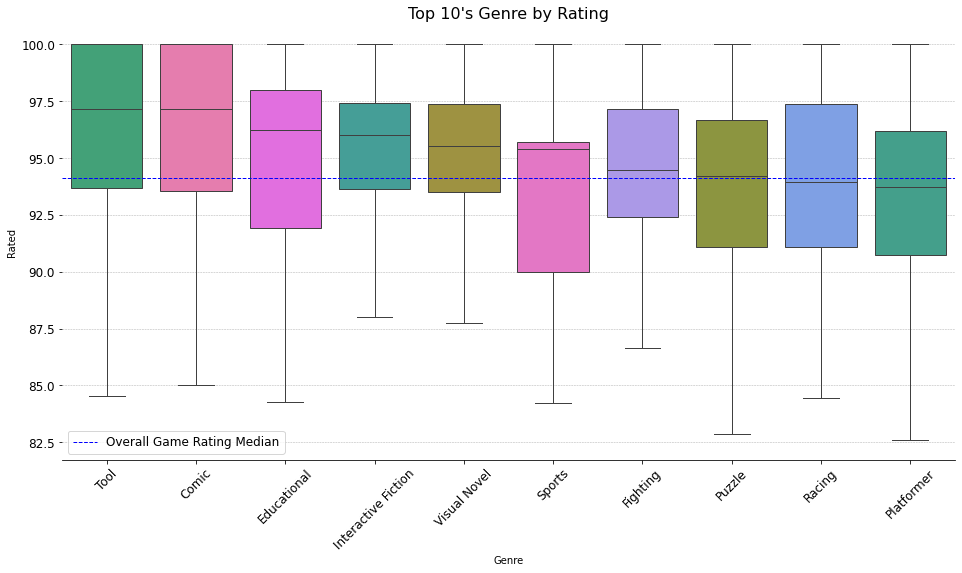

In [133]:
## Analyze by rating
## Filter top 10 genre
order1 = df.groupby(by=["Genre"]).median().sort_values(by="Rated", ascending=False)
order = order1.head(10)
order = order.index
order

## Box Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor="white")

sns.boxplot(x = "Genre", y = "Rated", data=df, showfliers=False, hue="Genre", ax=ax, order=order)

## Set line 
ax.axhline(df.loc[:, 'Rated'].median(), color="blue",linestyle="dashed", label="Overall Game Rating Median", linewidth=1)

## Aesthethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

plt.title("Top 10's Genre by Rating", fontsize=16)
plt.legend(fontsize=12)

plt.savefig('top_genre_by_rating.png')

Notes: 
- Tool, comic and educational rpducts have the highest average rating. Despite them not being relatively popular, these products still have the highest average rating. 

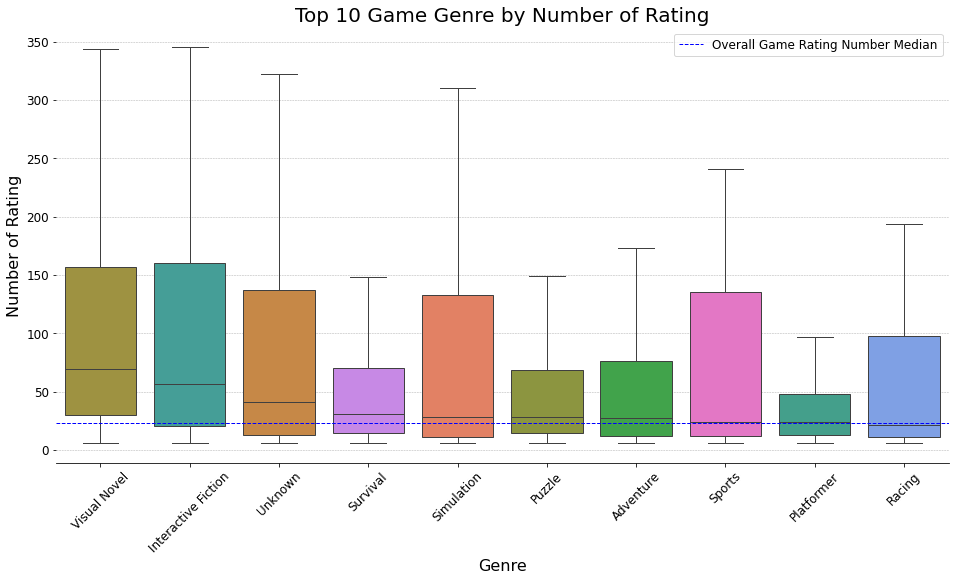

In [134]:
## Filter top 10 genre
order1 = df.groupby(by=["Genre"]).median().sort_values(by="RatingNumber", ascending=False)
order = order1.head(10)
order = order.index
order

## Box Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor="white")

sns.boxplot(x = "Genre", y = "RatingNumber", data=df, showfliers=False, hue="Genre", ax=ax, order=order)

## Set line 
ax.axhline(df.loc[:, 'RatingNumber'].median(), color="blue",linestyle="dashed", label="Overall Game Rating Number Median", linewidth=1)

## Aesthethic
# Label
plt.ylabel('Number of Rating', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.title("Top 10 Game Genre by Number of Rating", fontsize=20)

# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

plt.legend(fontsize=12)
plt.savefig('top_genre_by_popularity.png')

Notes: 
- As number of rating signify more on the product popularity, then it is logical that visual having the highest number of rating median. 
- Interactive fiction, which is similar to visual novel, comes in second place. This supports the notion that visual novel are the most popular genre in itch.io. 

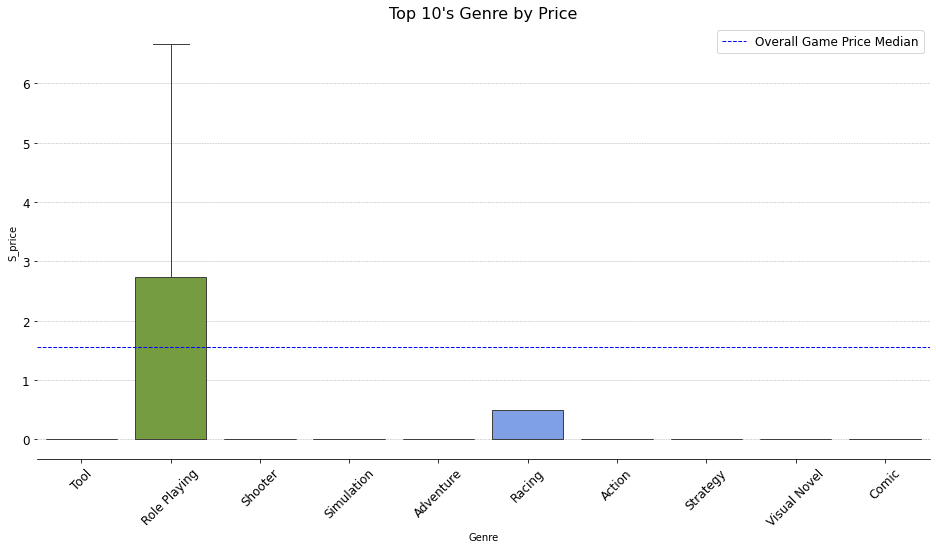

In [135]:
## Analyze by rating
## Filter top 10 genre
order1 = df.groupby(by=["Genre"]).mean().sort_values(by="S_price", ascending=False)
order = order1.head(10)
order = order.index
order

## Box Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor="white")

sns.boxplot(x = "Genre", y = "S_price", data=df, showfliers=False, hue="Genre", ax=ax, order=order)

## Set line 
ax.axhline(df.loc[:, 'S_price'].mean(), color="blue",linestyle="dashed", label="Overall Game Price Median", linewidth=1)

## Aesthethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

plt.title("Top 10's Genre by Price", fontsize=16)
plt.legend(fontsize=12)

Notes: 
- The most expensive products are tool, role playing, and shooter. As itch.io is famous for their free and donation based products, then these genres are more likely to be premium products that needs to be bought. 
- The Role playing genre notably has a high variation than other genre, which indicates that the role playing product that has the most price variation and less likely to be free. 

### Tags Category Exploration

#### Analysis on Platform Tags?

In [136]:
## Explode and make dummy of tags

all_tags = df["Platforms"].str.split(', ').apply(pd.Series).stack()
dummies = pd.get_dummies(all_tags).groupby(level=0).sum()
if len(dummies.axes[1]) <= 20:
    platform = df.drop("Platforms", axis=1).join(dummies, how="left")
else:
    platform = df.drop("Platforms", axis=1)

In [137]:
platform.sample(3)

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Languages,Tool,Tags,Currency,S_price,Android,Flash,HTML5,Linux,SKIP,Unity,Unknown,Windows,macOS
6826,Lose Control,Control your controller's controls,0.00,cookiecrayon,92.72727,11,Action,https://cookiecrayon.itch.io/lose-control,Unknown,Unity,"2D, Colorful, Comedy, Cute, Difficult, Funny, ...",$,0.00,0,0,1,0,0,0,0,1,1
2197,Long Spear,Use an extendable spear to solve puzzles and e...,0.00,TecoSV,94.08451,71,Puzzle,https://tecosv.itch.io/long-spear,Unknown,Godot,"1-bit, 2D, Godot, Pixel Art, Stealth",$,0.00,0,0,1,0,0,0,0,1,0
1295,The Lost Art of Innkeeping,"Having inherited Cascade Manor, you decide to ...",4.99,SeaPhoenix,95.19380,129,Simulation,https://seaphoenix.itch.io/lostart,English,RPG Maker,"2D, Multiple Endings, Mystery, Pixel Art, RPG ...",$,4.99,0,0,0,0,0,0,0,1,0


There are 5088 types of platform


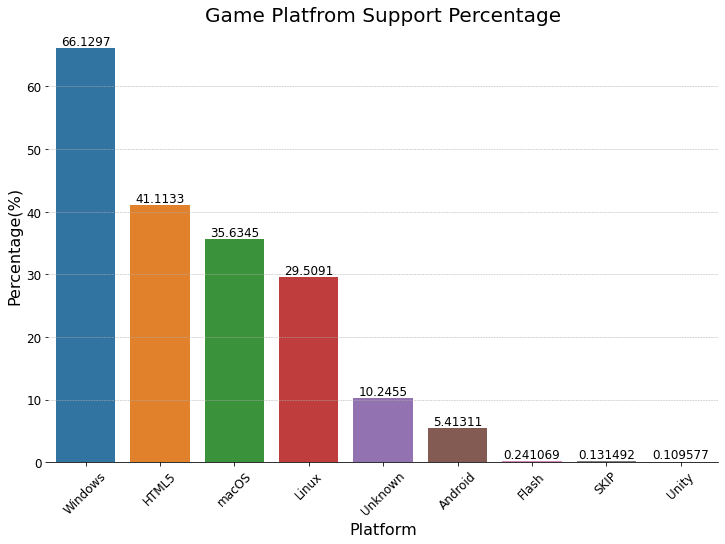

In [239]:
## What are the most popular platform?

# Filter df to only the platforms 
df_pivot = platform.loc[:,"Android":"macOS"]
df_pivot = (df_pivot.loc[:,"Android":"macOS"]/len(df_pivot))*100

# Transpose the axis so that the column become column name
# Count the total sum of each columns
pivot1 = df_pivot.T.sum(axis=1)
pivot1 = pd.DataFrame(pivot1).reset_index()
pivot1.columns = ["Platform","Percentage"]
pivot1 = pivot1.sort_values(by="Percentage", ascending=False)

## Make Bar Plot
fig, ax = plt.subplots(figsize=(12,8), facecolor='white')

sns.barplot(x = "Platform", y = "Percentage", data=pivot1, ax=ax)
ax.bar_label(ax.containers[0], fontsize=12)
sns.barplot(x = "Platform", y = "Percentage", data=pivot1, hue="Platform", ax=ax)


## Aesthethic
# Label
plt.xlabel('Platform', fontsize=16)
plt.ylabel('Percentage(%)', fontsize=16)
plt.title("Game Platfrom Support Percentage", fontsize=20)

# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

plt.savefig('game_platform_support.png')
print("There are " + str(all_tags.nunique()) + " types of platform")

Notes: 
- Windows, HTML5, and macOS are the most popular platform for itch.io products. All of this signify the popularity of PC (personal computer) platform. 

#### What about the Product Tool tags?

In [139]:
## Explode and make dummy of tags

all_tags = df["Tool"].str.split(', ').apply(pd.Series).stack()
dummies = pd.get_dummies(all_tags).groupby(level=0).sum()
Tool = df.drop("Tool", axis=1).join(dummies, how="left")

In [140]:
Tool.sample(2)

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tags,Currency,S_price,3ds Max,Adobe After Effects,Adobe Illustrator,Adobe Photoshop,Adventure Game Studio,Allegro,AppGameKit,Aseprite,Audacity,Bfxr,Blender,Bosca Ceoil,Box2D,Bullet (Physics Engine),ChipTone,Cinema 4D,Clickteam Fusion,Clip Studio Paint,Construct,Corona SDK,Crocotile 3D,Defold,Doodle Studio 95!,DragonRuby GTK,FL Studio,FNA,FlashDevelop,Flickgame,GB Studio,GDevelop,GIMP,GameMaker: Studio,Godot,GraphicsGale,HTC Vive,Haxe,Impact,IndieCade,Inkscape,Krita,LMMS,Lightweight Java Game Library,Logic Pro,LÖVE,MagicaVoxel,Maya,MilkyTracker,MonoGame,Multimedia Fusion,Oculus Rift,OpenFL,PICO-8,Paint Tool SAI,Paint.net,Phaser,Piskel,Pixel Vision 8,Pixelmator,PixiJS,Playdate,Processing,PuzzleScript,Pyxel Edit,REXPaint,RPG Maker,RPG in a Box,Ren'Py,Renoise,Rust,SDL,SFML,SKIP,SketchUp,Stencyl,Sublime Text,Substance Painter & designer,Superpowers,TIC-80,Three.js,Tiled,Torque 2D,Twine,TyranoBuilder,Unity,Unknown,Unreal Engine,Wings3D,XNA,ZBrush,bitsy,ct.js,libGDX,melonJS,p5.js,pygame,raylib
3146,Valentine's Rain,"A dark, mystery/thriller visual novel",0.00,Dracino,99.53488,43,Visual Novel,https://dracino.itch.io/valentines-rain,"Windows, macOS, Linux, Android",Unknown,"Crime, Dark, Detective, Furry, Mystery, Noir",$,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2849,Find Yourself,A psychological horror the first person.,0.69,EMIKA_GAMES,92.65306,49,Unknown,https://emika-games.itch.io/find-yourself,Windows,"German, English, Russian","3D, Atmospheric, Creepy, First-Person, Horror,...",$,0.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


There are 96 types of tools


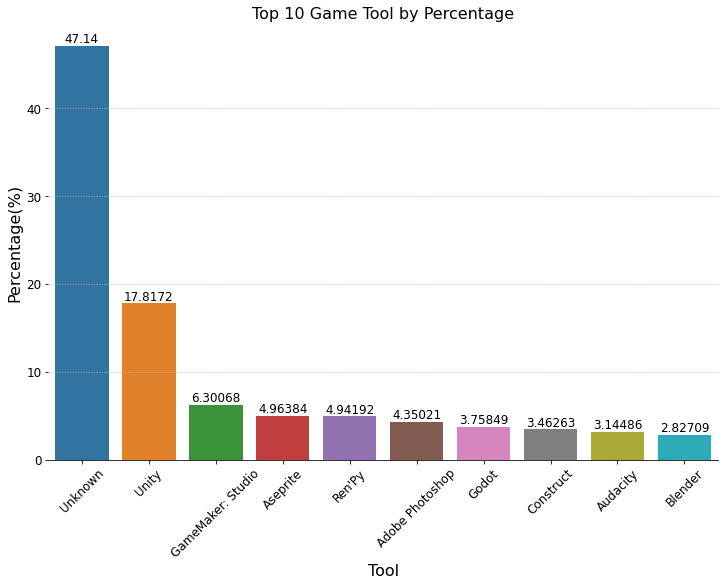

In [141]:
## What it the most popular platform?

# Get the first and last element of tags list
list_tags = all_tags.unique()
list_tags =  sorted(list_tags)
first = list_tags[0]
last = list_tags[-1]


# Filter df to only the platforms 
df_pivot = Tool.loc[:,first:last]
df_pivot = (df_pivot.loc[:,first:last]/len(df_pivot))*100

# Transpose the axis so that the column become column name
# Count the total sum of each columns
pivot1 = df_pivot.T.sum(axis=1)
pivot1 = pd.DataFrame(pivot1).reset_index()
pivot1.columns = ["Tool","Percentage"]
pivot1 = pivot1.sort_values(by="Percentage", ascending=False)
pivot1 = pivot1.head(10)

## Make Bar Plot
fig, ax = plt.subplots(figsize=(12,8), facecolor='white')

sns.barplot(x = "Tool", y = "Percentage", data=pivot1, ax=ax)
ax.bar_label(ax.containers[0], fontsize=12)
sns.barplot(x = "Tool", y = "Percentage", data=pivot1, hue="Tool", ax=ax)

## Aesthethic
# Label
plt.xlabel('Tool', fontsize=16)
plt.ylabel('Percentage(%)', fontsize=16)
plt.title("Game Platfrom Support Percentage", fontsize=20)

# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

plt.title("Top 10 Game Tool by Percentage", fontsize=16)

plt.savefig('top_10_tool.png')

print("There are " + str(all_tags.nunique()) + " types of tools")

Notes: 
- Meanwhile interestingly most of the product in itch.io doesn't mentioned their tool through the "unknown" tags. Meanwhile Unity and GameMaker:Studio are the leading most popular tools as a development program.

#### What about Language tags?

In [142]:
## Explode and make dummy of tags
all_tags = df["Languages"].str.split(', ').apply(pd.Series).stack()
dummies = pd.get_dummies(all_tags).groupby(level=0).sum()
Languages = df.drop("Languages", axis=1).join(dummies, how="left")

There are 188 languages


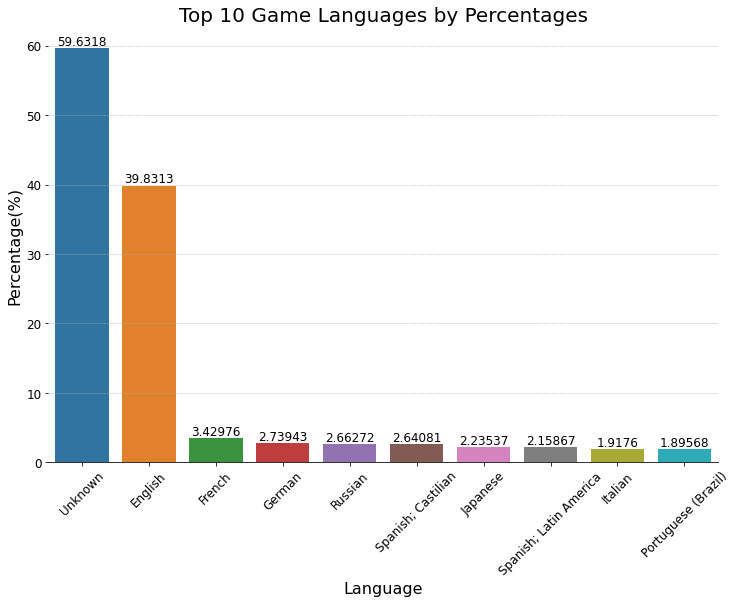

In [143]:
## What it the most popular platform?

# Get the first and last element of tags list
list_tags = all_tags.unique()
list_tags =  sorted(list_tags)
first = list_tags[0]
last = list_tags[-1]


# Filter df to only the platforms 
df_pivot = Languages.loc[:,first:last]
df_pivot = (df_pivot.loc[:,first:last]/len(df_pivot))*100


# Transpose the axis so that the column become column name
# Count the total sum of each columns
pivot1 = df_pivot.T.sum(axis=1)
pivot1 = pd.DataFrame(pivot1).reset_index()
pivot1.columns = ["Languages","Percentage"]
pivot1 = pivot1.sort_values(by="Percentage", ascending=False)
pivot1 = pivot1.head(10)

## Make Bar Plot
fig, ax = plt.subplots(figsize=(12,8), facecolor='white')

sns.barplot(x = "Languages", y = "Percentage", data=pivot1, ax=ax)
ax.bar_label(ax.containers[0], fontsize=12)
sns.barplot(x = "Languages", y = "Percentage", data=pivot1, hue="Languages", ax=ax)

## Aesthethic
# Label
plt.xlabel('Language', fontsize=16)
plt.ylabel('Percentage(%)', fontsize=16)
plt.title("Top 10 Game Languages by Percentages", fontsize=20)

# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")


plt.savefig('top_10_languages.png')
print("There are " + str(all_tags.nunique()) + " languages")

Notes:
- The languange tags also is predominatly having the "unknown" tags. This is followed by english and french as the 2nd and 3rd most popular tags. 

#### What about Game tags?

In [144]:
## Explode and make dummy of tags
all_tags = df["Tags"].str.split(', ').apply(pd.Series).stack()
dummies = pd.get_dummies(all_tags).groupby(level=0).sum()
Tags = df.drop("Tags", axis=1).join(dummies, how="left")

There are 5088 tags.


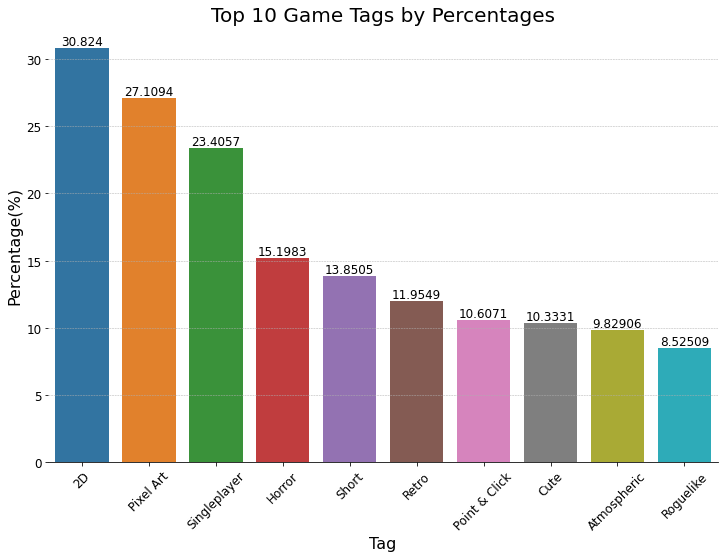

In [145]:
## What it the most popular platform?

# Get the first and last element of tags list
list_tags = all_tags.unique()
list_tags =  sorted(list_tags)
first = list_tags[0]
last = list_tags[-1]


# Filter df to only the platforms 
df_pivot = Tags.loc[:,first:last]
df_pivot = (df_pivot.loc[:,first:last]/len(df_pivot))*100

# Transpose the axis so that the column become column name
# Count the total sum of each columns
pivot1 = df_pivot.T.sum(axis=1)
pivot1 = pd.DataFrame(pivot1).reset_index()
pivot1.columns = ["Tags","Percentage"]
pivot1 = pivot1.sort_values(by="Percentage", ascending=False)
pivot1 = pivot1.head(10)

## Make Bar Plot
fig, ax = plt.subplots(figsize=(12,8), facecolor='white')

sns.barplot(x = "Tags", y = "Percentage", data=pivot1, ax=ax)
ax.bar_label(ax.containers[0], fontsize=12)
sns.barplot(x = "Tags", y = "Percentage", data=pivot1, hue="Tags", ax=ax)

## Aesthethic
# Label
plt.xlabel('Tag', fontsize=16)
plt.ylabel('Percentage(%)', fontsize=16)
plt.title("Top 10 Game Tags by Percentages", fontsize=20)

# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

plt.savefig('top_10_tags.png')
print("There are " + str(all_tags.nunique()) + " tags.")

Notes: 
- 2D, Pixel Art, and Singleplayer games are the most popular game genre tag. These 3 tags is synonymous with visual novel and role playing games, which can explain why they are the most popular tags. 

# Clustering

In [146]:
## Load cluster

X = df[cont_vars].copy()

## Early visualization

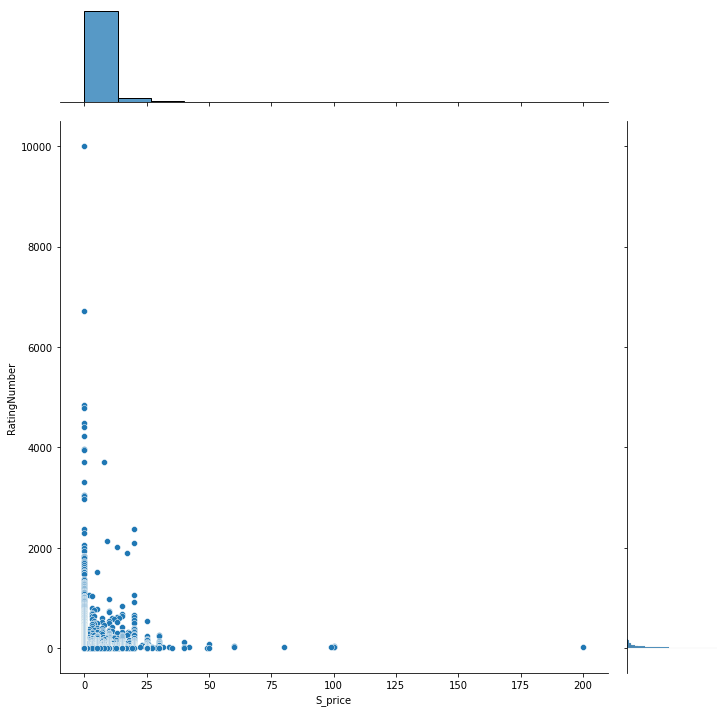

In [147]:
x = sns.jointplot(data=df, x="S_price", y="RatingNumber", height=10)
x.fig.set_facecolor("white")
#x.fig.set_title("Jointplot of Rating and Price", fontsize=20)
x.savefig('early_jointplot.png')

Notes: 
- In first glance there seems to be 1 big cluster. Considering the distribution shape, I don't think that DBSCAN clustering will work well since these 2 group have a high density which can compute a biased result. K-Means++ or Fuzzy K-means seems to be more appropriate.

## Encoding and PCA

### Encoding and Scaling

In [148]:
## Import encode
from sklearn import preprocessing

# Import label encoder
label_encoder = preprocessing.LabelEncoder()

In [149]:
df1 = df.copy()

In [150]:
tag_vars

['Platforms', 'Languages', 'Tool', 'Tags']

In [151]:
## Convert to list

# Split by ","
all_tags = df1["Tags"].str.split(', ').apply(pd.Series).stack()
dummies = pd.get_dummies(all_tags).groupby(level=0).sum()

print(len(dummies.axes[1]))

5088


In [152]:
## Tag Variables One Hot Encoding
for var in tag_vars:
    all_tags = df1[var].str.split(', ').apply(pd.Series).stack()
    dummies = pd.get_dummies(all_tags).add_prefix(var+"_").groupby(level=0).sum()
    if len(dummies.axes[1]) <= 20:
        df1 = df1.drop(var, axis=1).join(dummies, how="left")
    else:
        df1 = df1.drop(var, axis=1)

In [153]:
df1.sample(3)

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Currency,S_price,Platforms_Android,Platforms_Flash,Platforms_HTML5,Platforms_Linux,Platforms_SKIP,Platforms_Unity,Platforms_Unknown,Platforms_Windows,Platforms_macOS
1072,Quit the game to win,It's not as simple as it sounds.,0.00,Andrea Pignataro,81.84211,152,Puzzle,https://approductions.itch.io/quit-the-game-to...,$,0.00,0,0,0,0,0,0,0,1,0
7207,That Dream Again,An exploration game made for Ludum Dare 47,0.00,bokoyoss,84.00000,10,Platformer,https://bokonon-yossarian.itch.io/that-dream-a...,$,0.00,0,0,1,0,0,0,0,1,0
5206,Gravity Express,Battle gravity while transporting cargo,9.99,Nino [Gravity Express],100.00000,18,Platformer,https://ninovanhooff.itch.io/gravity-express,$,9.99,0,0,0,0,0,0,1,0,0


In [154]:
## Categorical One Hot Encoding
for var in cat_vars:
    ## Since dummy encoding can lead to multicollinearity, we drop first of the dummy category generated
    dummies = pd.get_dummies(df1[var], drop_first=True)
    df1 = pd.concat([df1, dummies], axis=1)
    df1 = df1.drop(var, axis=1)

In [155]:
## Drop name and Id variables
dropped = (id_vars)

df1 = df1.drop(id_vars, axis=1)

In [156]:
df1.sample(3)

,Price,Rated,RatingNumber,S_price,Platforms_Android,Platforms_Flash,Platforms_HTML5,Platforms_Linux,Platforms_SKIP,Platforms_Unity,Platforms_Unknown,Platforms_Windows,Platforms_macOS,Adventure,Card Game,Comic,Educational,Fighting,Interactive Fiction,Platformer,Puzzle,Racing,Rhythm,Role Playing,Shooter,Simulation,Sports,Strategy,Survival,Tool,Unknown,Visual Novel,£
37,0.00,95.29797,1527,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2789,0.00,96.07843,51,0.00,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1560,19.99,91.92308,104,19.99,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
df1 = df1.drop("Price", axis=1)

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [160]:
## Check vif value 

# Add a constant (intercept) to the model
X = add_constant(df1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Feature         VIF
0                 const  296.973834
1                 Rated    1.132462
2          RatingNumber    1.042334
3               S_price    1.088024
4     Platforms_Android    1.063982
5       Platforms_Flash    1.020328
6       Platforms_HTML5    1.965806
7       Platforms_Linux    2.025575
8        Platforms_SKIP    1.017130
9       Platforms_Unity    1.004661
10    Platforms_Unknown    2.463235
11    Platforms_Windows    2.612539
12      Platforms_macOS    2.280459
13            Adventure    1.754700
14            Card Game    1.189884
15                Comic    1.713587
16          Educational    1.019927
17             Fighting    1.025105
18  Interactive Fiction    1.292450
19           Platformer    1.696252
20               Puzzle    1.675263
21               Racing    1.017365
22               Rhythm    1.225890
23         Role Playing    1.324044
24              Shooter    1.240002
25           Simulation    1.242149
26               Sports    1

Notes:
- There is no vif value more than 5. So it could be concluded that there are no multicolliniearity problem. 

In [161]:
df_tf = df1.copy()

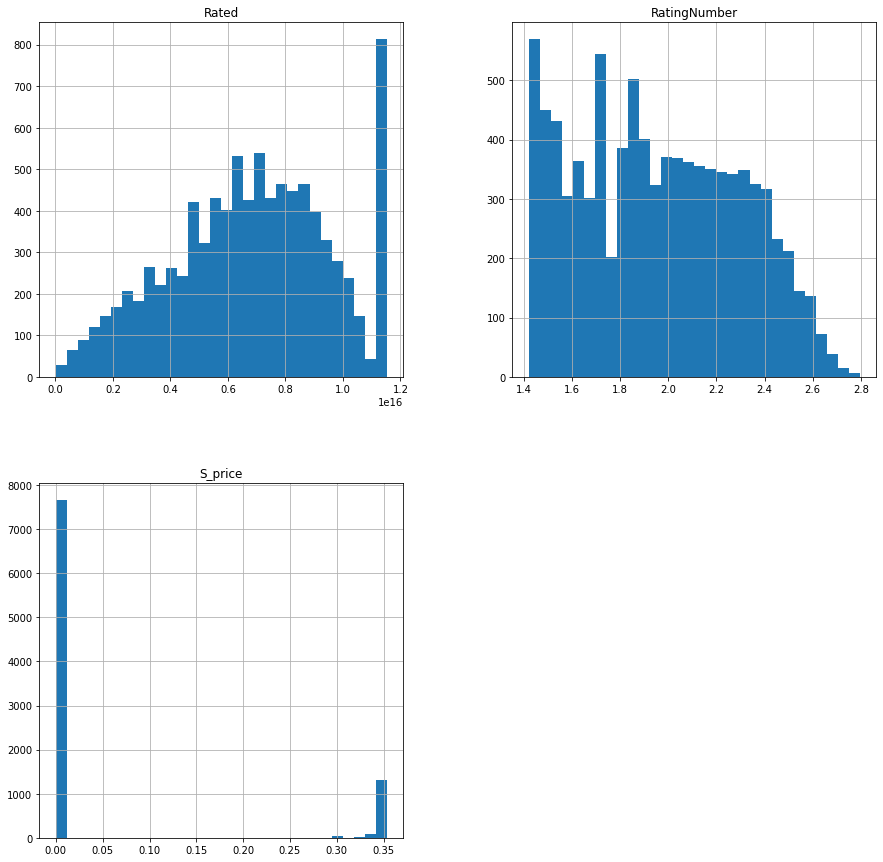

In [162]:
# Yeo Johnson Distribution 
tmp = df1.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(tmp[var])

# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

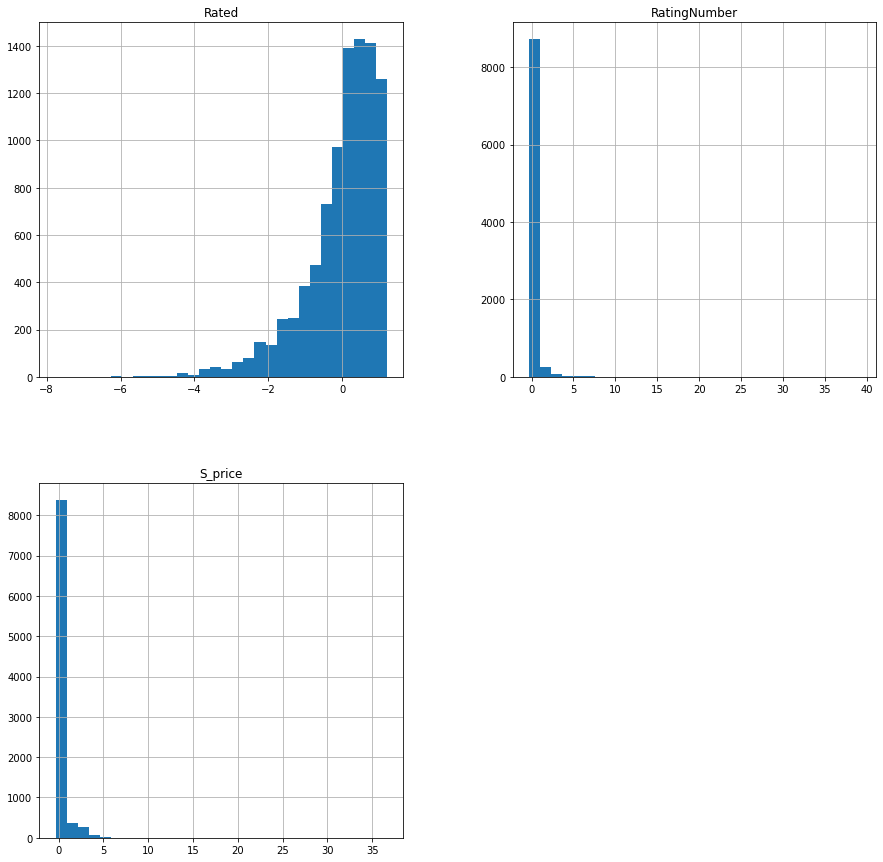

In [163]:
## Standard Scalling 

from sklearn.preprocessing import StandardScaler

## Load scaler
scaler = StandardScaler()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    df_tf[var] = scaler.fit_transform(df_tf[[var]])

# plot the histograms of the transformed variables
df_tf[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Notes:
- As i don't want to remove the outlier due the outlier doesn't come from data collection mistake, The transformation method wil be choose by the best distribution and scaling. 
- Yeo johnson generate better distribution but the scaling of the "Rated" variable is too large compared to other variables. 
- Standard Scaling (Z-score) is choosen as the transformation.

### PCA

In [164]:
from sklearn.decomposition import PCA

In [165]:
pca = PCA()
pca.fit(df_tf)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

In [166]:
cum_var_exp

array([0.22178975, 0.43259719, 0.62891223, 0.73193887, 0.77975357,
       0.81154919, 0.83327861, 0.85410125, 0.87329204, 0.89063891,
       0.90541465, 0.91869089, 0.93012852, 0.93981168, 0.94833713,
       0.95656868, 0.96400054, 0.97042279, 0.97683214, 0.98271696,
       0.98776647, 0.99167559, 0.99479688, 0.99621803, 0.99719383,
       0.99782268, 0.99830639, 0.99878947, 0.99922398, 0.9995115 ,
       0.99977638, 1.        ])

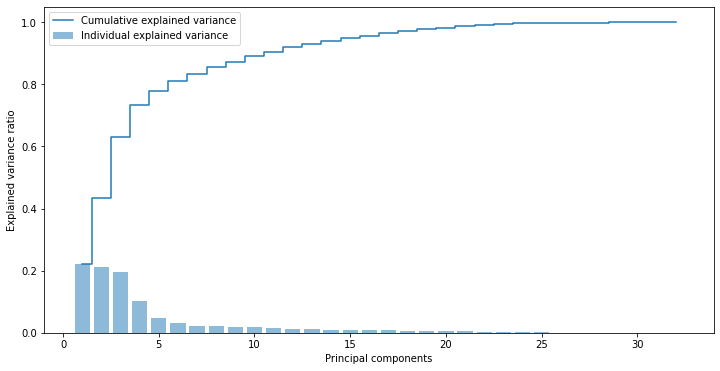

In [167]:
plt.figure(figsize=(12,6))
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

In [168]:
## Limit the total variable to 95% total explained variance
n_variables_95 = np.argmax(cum_var_exp >= 0.95) + 1

print("Number of variables to retain 95% variance:", n_variables_95)

Number of variables to retain 95% variance: 16


Notes: 
- 16 variables is enough to explain 95% variation of the data. Then I will only use 16 variables to ease the clustering computing process. 

In [169]:
data1 = df_tf.iloc[:,0:16].copy()
data1

,Rated,RatingNumber,S_price,Platforms_Android,Platforms_Flash,Platforms_HTML5,Platforms_Linux,Platforms_SKIP,Platforms_Unity,Platforms_Unknown,Platforms_Windows,Platforms_macOS,Adventure,Card Game,Comic,Educational
0,0.262308,39.196294,-0.28788,0,0,1,1,0,0,0,1,1,0,0,0,0
1,0.217355,26.160059,-0.28788,0,0,1,1,0,0,0,1,1,0,0,0,0
2,0.442785,18.777333,-0.28788,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1.017124,18.524662,-0.28788,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.030583,17.360008,-0.28788,1,0,0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,-1.028291,-0.303262,-0.28788,0,0,1,0,0,0,0,0,0,0,0,0,0
9122,-0.468394,-0.303262,-0.28788,0,0,1,1,0,0,0,1,1,0,0,0,0
9123,0.091504,-0.303262,-0.28788,0,0,0,1,0,0,0,1,0,0,0,0,0
9124,0.091504,-0.303262,-0.28788,0,0,1,0,0,0,0,0,0,0,0,0,0


# Clustering

## K-Means Clustering

In [170]:
## Kmeans
from sklearn.cluster import KMeans

## Import Silhouette score
from sklearn.metrics import silhouette_score

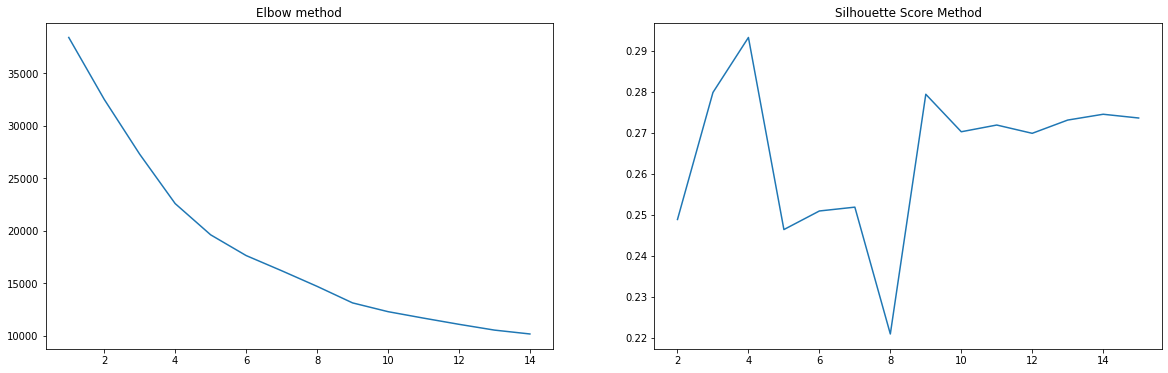

In [171]:
sse = {}
sil = []
kmax= 15

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

# Elbow Method:
plt.subplot(1,2,1)

for i in range(1,15):
    kmeans = KMeans(n_clusters = i, random_state = 1, init="k-means++",)
    kmeans.fit(data1)
    sse[i] = kmeans.inertia_

sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title("Elbow method")

## Silhouette Score
plt.subplot(1,2,2)
for k in range (2, kmax + 1):
    kmeans = KMeans(n_clusters = k, random_state = 1, init="k-means++",)
    kmeans.fit(data1)
    labels = kmeans.labels_
    sil.append(silhouette_score(data1, labels, metric = 'euclidean'))

sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')

plt.show()

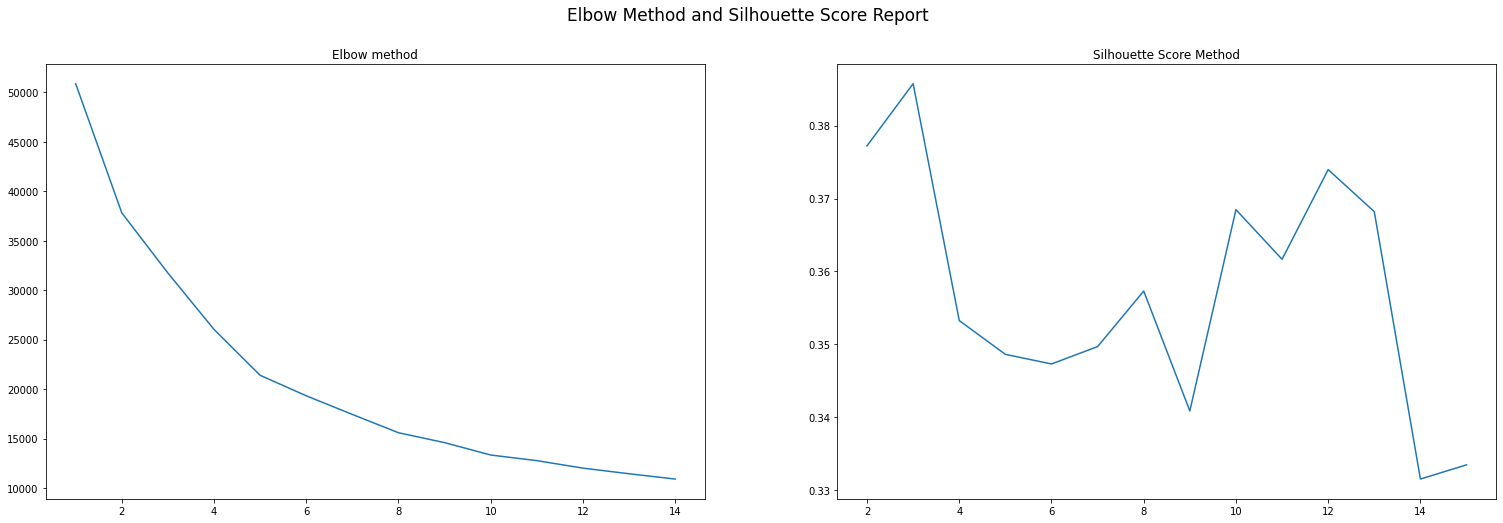

In [241]:
sse = {}
sil = []
kmax= 15

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(26,8), facecolor="white")

for i in range(1,15):
    kmeans = KMeans(n_clusters = i, random_state = 1, init="k-means++",)
    kmeans.fit(data1)
    sse[i] = kmeans.inertia_

sns.lineplot(x = list(sse.keys()), y = list(sse.values()), ax=ax0)
ax0.title.set_text('Elbow method')

for k in range (2, kmax + 1):
    kmeans = KMeans(n_clusters = k, random_state = 1, init="k-means++",)
    kmeans.fit(data1)
    labels = kmeans.labels_
    sil.append(silhouette_score(data1, labels, metric = 'euclidean'))

sns.lineplot(x = range(2,kmax + 1), y = sil, ax=ax1)
ax1.title.set_text('Silhouette Score Method')
plt.suptitle("Elbow Method and Silhouette Score Report", fontsize="17")

plt.savefig('k_parameter.png')

In [173]:
kmeans = KMeans(n_clusters = i, random_state = 1, init="k-means++",)
kmeans.fit(data1)
sse[i] = kmeans.inertia_


Notes: 
- Based on the Elbow and Silhouette Score, the best cluster is 4. 

In [174]:
K = 4

In [175]:
## Smart fit
kmeans = KMeans(n_clusters=K, init="k-means++", random_state = 1)

clusters = kmeans.fit(data1)

## Append cluster ppoints
df["KM_Clusters"] = clusters.labels_

In [176]:
df.sample(10)

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tool,Tags,Currency,S_price,KM_Clusters
7171,#19: The Sun (Alpha Demo 2),Bullet Hell/Surreal Exploration Game,0.00,lsddev,88.00000,10,Shooter,https://lsddev.itch.io/19-the-sun-alpha-demo,"Windows, macOS, Linux",Unknown,Unknown,"3D, Abstract, Bullet Hell, Exploration, First-...",$,0.00,2
8200,Eburnean,Shoot bosses that do stupid puns ! With paint ...,0.00,Lucas Delvallet,100.00000,7,Shooter,https://lucas-delvallet.itch.io/eburnean,Unknown,"English, French",Unknown,"2D, Abstract, Boss battle, Bullet Hell, Colorf...",$,0.00,1
8216,Doko Roko,A symbiosis with ancient shadows. A tower full...,10.00,Ericsmack,94.28571,7,Platformer,https://ericsmack.itch.io/doko-roko,"Windows, macOS, Linux",English,Unknown,"2D, Atmospheric, Boss battle, Bullet Hell, Hac...",$,10.00,3
590,Delta-Gal,3D lowpoly/pixelart metroidvania,0.00,Arthur Vyater,96.77165,254,Adventure,https://arthur-vyater.itch.io/delta-gal,"Windows, macOS, Linux",Unknown,Unknown,"Low-poly, Metroidvania, Pixel Art, Third-Perso...",$,0.00,1
9003,Godot Dialogue System 2,An advanced non-linear dialogue system for the...,6.99,radmatt,93.33333,6,Tool,https://radmatt.itch.io/dialoguesystem2,Unknown,English,Godot,"dialogue, gamepad, Narrative, Nonlinear, Story...",$,6.99,1
6642,Strange Gravity,A FPS/RTS hybrid about mini-planetoids and fun...,0.00,Ian Burnette,95.00000,12,Strategy,https://ianburnette.itch.io/strange-gravity,"Windows, macOS, Linux, Unity",Unknown,Unity,"7dfps, FPS, Futuristic, Low-poly, Physics, Rea...",$,0.00,1
1290,Lawmage Academy,"Learn spells, craft potions, make friends, and...",0.00,Verinius,96.74419,129,Adventure,https://verinius.itch.io/lawmage-academy,"Windows, macOS",English,RPG Maker,"2D, Anime, Meaningful Choices, Mystery, Pixel ...",$,0.00,1
2045,Low Mem Sky,"De-make of ""No Man's Sky""... in PICO-8",0.00,Paul Nicholas (Liquidream),91.28205,78,Action,https://liquidream.itch.io/low-mem-sky-jam-ver...,"Windows, macOS, Linux, HTML5",Unknown,PICO-8,"Demake, demakejam, PICO-8, Space Sim",$,0.00,1
8054,Brush Transformations in Aseprite,Rotate and flip custom brushes,0.00,Kacper Wo?niak,100.00000,8,Tool,https://thkaspar.itch.io/brush-transformation,"Windows, macOS, Linux",Unknown,Unknown,"addon, Aseprite, brush, extension, Pixel Art, ...",$,0.00,1
2235,Spring Cleaning,"Time for spring cleaning! Dust your drawers, c...",0.00,RedVoxel,89.71429,70,Interactive Fiction,https://red-voxel.itch.io/spring-cleaning,HTML5,English,Construct,"1-bit, 2D, Dark, Gore, Horror, Pixel Art, Poin...",$,0.00,1


<function matplotlib.pyplot.show(close=None, block=None)>

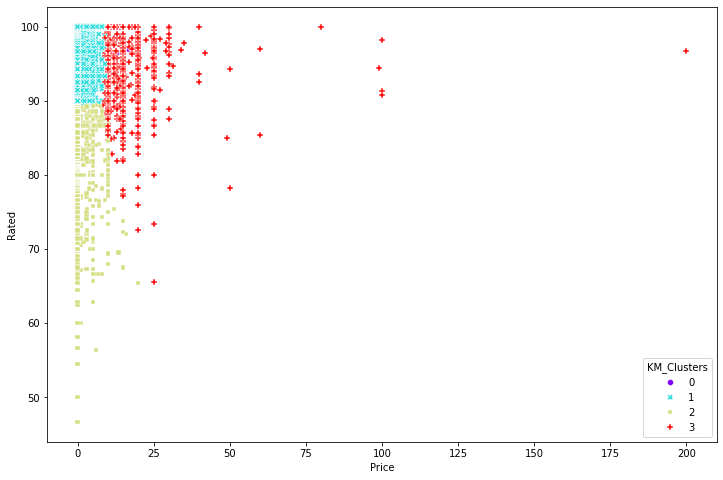

In [177]:
## plot early scatter plot
fig, ax = plt.subplots(figsize=(12,8), facecolor="white")
sns.scatterplot(x="Price", y="Rated", data=df, ax=ax, hue="KM_Clusters", style="KM_Clusters", palette="rainbow")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

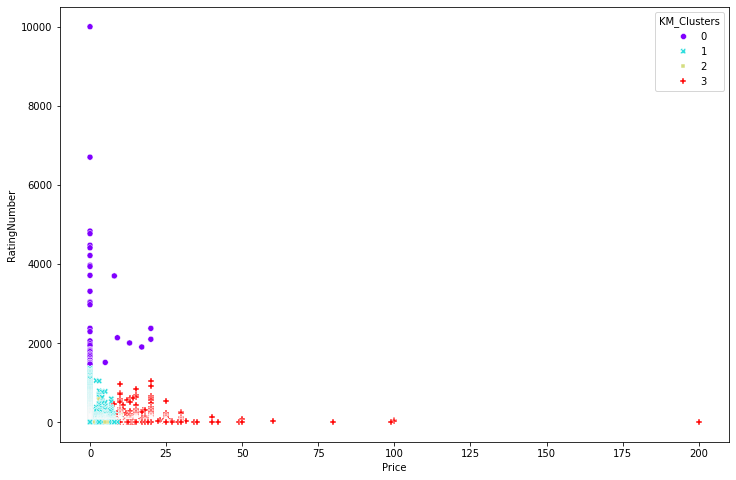

In [178]:
## plot early scatter plot
fig, ax = plt.subplots(figsize=(12,8), facecolor="white")
sns.scatterplot(x="Price", y="RatingNumber", data=df, ax=ax, hue="KM_Clusters", style="KM_Clusters", palette="rainbow")
plt.show

In [179]:
## Evaluate the clusters

from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score  
from sklearn.metrics import calinski_harabasz_score

In [180]:
data1["KM_Clusters"] = clusters.labels_

In [181]:
print("Silhouette score: {}".format(silhouette_score(data1.drop(['KM_Clusters'], axis=1), clusters.labels_)))
print("Davies Bouldin score: {}".format(davies_bouldin_score(data1.drop(['KM_Clusters'], axis=1), clusters.labels_)))
print("Calinski Harabasz score: {}".format(calinski_harabasz_score(data1.drop(['KM_Clusters'], axis=1), clusters.labels_))) 

Silhouette score: 0.29325727173196386
Davies Bouldin score: 1.0873549870070494
Calinski Harabasz score: 2131.373970781883


Notes: 
- To compare the 2 clustering methods, I will use the Silhouette and DBI score.

## Fuzzy C-Means

In [182]:
## Import package 
from fcmeans import FCM

In [ ]:
import skfuzzy as fuzz

In [184]:
from sklearn.metrics import silhouette_score

Silhouette score for fuzzy CMeans with 2 clusters: 0.276
Silhouette score for fuzzy CMeans with 3 clusters: 0.186
Silhouette score for fuzzy CMeans with 4 clusters: 0.182
Silhouette score for fuzzy CMeans with 5 clusters: 0.171
Silhouette score for fuzzy CMeans with 6 clusters: 0.147
Silhouette score for fuzzy CMeans with 7 clusters: 0.081
Silhouette score for fuzzy CMeans with 8 clusters: 0.176
Silhouette score for fuzzy CMeans with 9 clusters: 0.151
Silhouette score for fuzzy CMeans with 10 clusters: 0.115


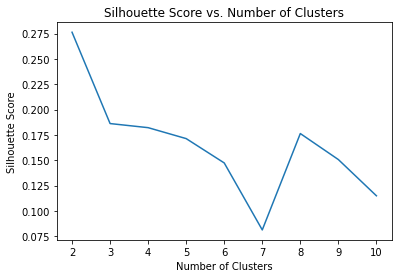

In [ ]:
c_range = range(2, 11)

silhouette_scores = []

for c in c_range:
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data1.T, c=c, m=2, error=0.005, maxiter=1000)
    cluster_assignments = np.argmax(u, axis=0)
    fuzzy_centers = cntr.T


    silhouette_avg_fmeans = silhouette_score(data1, cluster_assignments)
    print(f'Silhouette score for fuzzy CMeans with {c} clusters: {silhouette_avg_fmeans:.3f}')
    silhouette_scores.append(silhouette_avg_fmeans)

plt.plot(c_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [186]:
## Assign the centers point
fcm = FCM(n_clusters=K, random_state = 1)
fcm.fit(data1.values)
fcm_centers = fcm.centers


## Predict the centers 
fcm_label = fcm.predict(data1.values)
df["Fuzzy_clusters"] = fcm_label

In [187]:
df.sample(3)

,Name,Description,Price,Author,Rated,RatingNumber,Genre,Link,Platforms,Languages,Tool,Tags,Currency,S_price,KM_Clusters,Fuzzy_clusters
5088,homerun bun,smack a ball as high as you can!,0.0,torcado,94.73684,19,Action,https://torcado.itch.io/homerun-bun,"Windows, Linux",Unknown,Unknown,"2D, bunny, Christmas, Cute, juggling, keep-up,...",$,0.0,1,1
266,veadotube mini,"the lightweight, easy-to-use pngtuber app",0.0,olmewe,98.04979,482,Tool,https://olmewe.itch.io/veadotube-mini,"Windows, macOS, Linux",English,Unknown,"giftuber, pngtuber, vtuber",$,0.0,1,1
8639,Var'Alith,Satisfy a demon and gather 5 living people to ...,0.0,diredire,100.00000,6,Card Game,https://diredire.itch.io/varalith,HTML5,Unknown,Unity,"2D, devil, esoteric, Horror, Ludum Dare 43, Pi...",$,0.0,1,2


<function matplotlib.pyplot.show(close=None, block=None)>

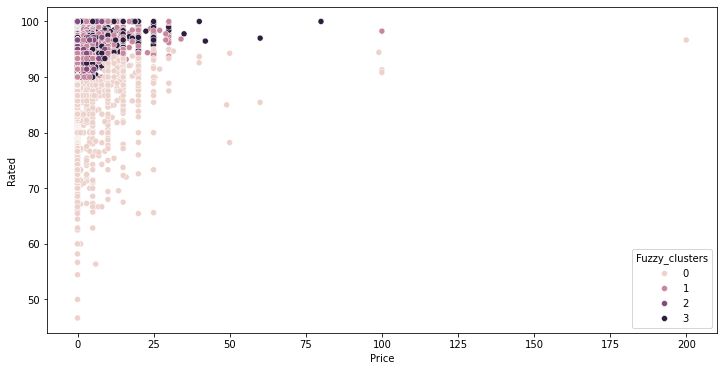

In [188]:
## plot early scatter plot
fig, ax = plt.subplots(figsize=(12,6), facecolor="white")
sns.scatterplot(x="Price", y="Rated", data=df, ax=ax, hue="Fuzzy_clusters")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

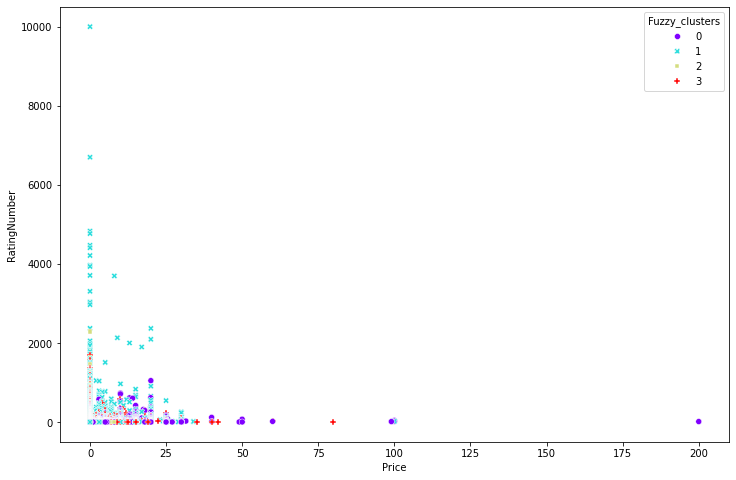

In [190]:
## plot early scatter plot
fig, ax = plt.subplots(figsize=(12,8), facecolor="white")
sns.scatterplot(x="Price", y="RatingNumber", data=df, ax=ax, hue="Fuzzy_clusters", style="Fuzzy_clusters", palette="rainbow")
plt.show

In [191]:
## Evaluate the clusters
from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score  
from sklearn.metrics import calinski_harabasz_score

In [192]:
data1["Fuzzy_clusters"] = fcm_label

In [193]:
print("Silhouette score: {}".format(silhouette_score(data1.drop(['Fuzzy_clusters'], axis=1), fcm_label)))
print("Davies Bouldin score: {}".format(davies_bouldin_score(data1.drop(['Fuzzy_clusters'], axis=1), fcm_label)))
print("Calinski Harabasz score: {}".format(calinski_harabasz_score(data1.drop(['Fuzzy_clusters'], axis=1), fcm_label))) 

Silhouette score: 0.18263553032880117
Davies Bouldin score: 1.875037001912927
Calinski Harabasz score: 1237.2418074545533


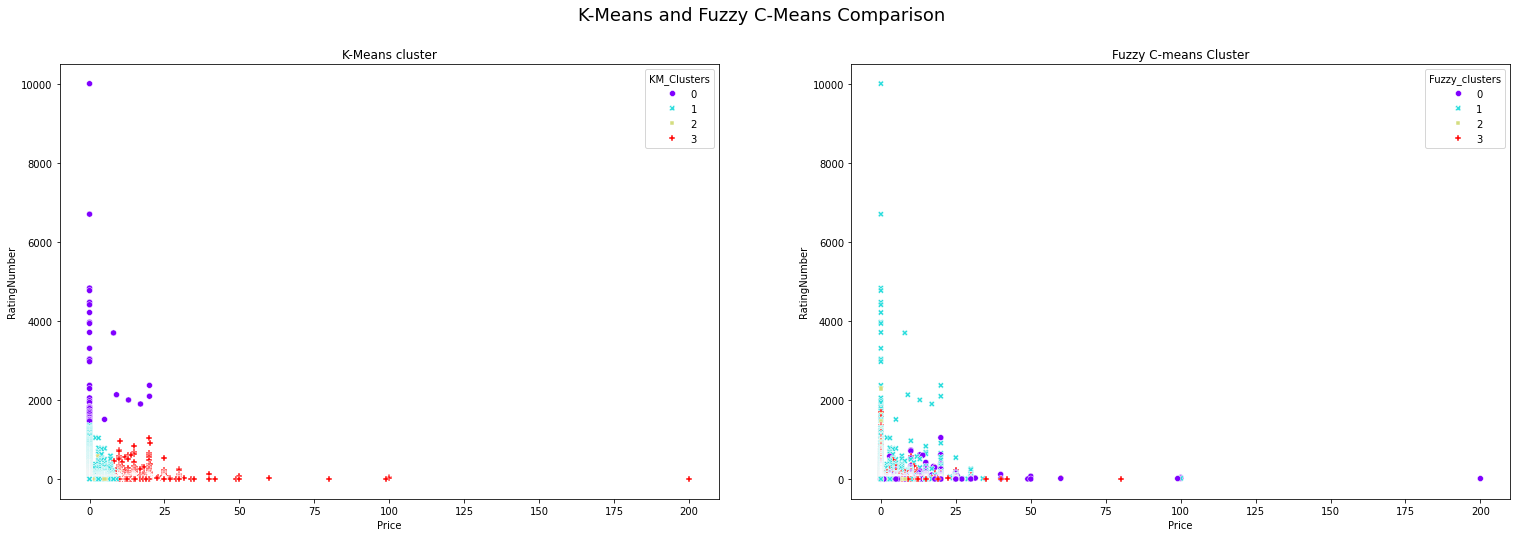

In [194]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(26,8), facecolor="white")

sns.scatterplot(x="Price", y="RatingNumber", data=df, ax=ax0, hue="KM_Clusters", style="KM_Clusters", palette="rainbow")
ax0.title.set_text('K-Means cluster')

sns.scatterplot(x="Price", y="RatingNumber", data=df, ax=ax1, hue="Fuzzy_clusters", style="Fuzzy_clusters", palette="rainbow")
ax1.title.set_text('Fuzzy C-means Cluster')

fig.suptitle("K-Means and Fuzzy C-Means Comparison", fontsize=18)


fig.savefig('Cluster_Comparison.png')

In [195]:
print("K-Means Evaluation Metric:")
print("Silhouette score: {}".format(silhouette_score(data1.drop(['KM_Clusters'], axis=1), clusters.labels_)))
print("Davies Bouldin score: {}".format(davies_bouldin_score(data1.drop(['KM_Clusters'], axis=1), clusters.labels_)))

print("Fuzzy C-Means Evaluation Metric:")
print("Silhouette score: {}".format(silhouette_score(data1.drop(['Fuzzy_clusters'], axis=1), fcm_label)))
print("Davies Bouldin score: {}".format(davies_bouldin_score(data1.drop(['Fuzzy_clusters'], axis=1), fcm_label)))

K-Means Evaluation Metric:
Silhouette score: 0.36155507923097435
Davies Bouldin score: 1.003557956982513
Fuzzy C-Means Evaluation Metric:
Silhouette score: 0.18263553032880117
Davies Bouldin score: 1.875037001912927


Notes: 
- K-means clusters have a silhouette score of 0.293 and DBI score of 1.087. 
- Meanwhile the fuzzy c-means clusters have silhouette score of 0.182 and DBI score of 1.875. 
- Therefore, I choose the k-means clusters for further analysis as it is the best clusters.

## Cluster Evaluation

In [255]:
## Save the project for now
df.to_csv('itch_cluster.csv')

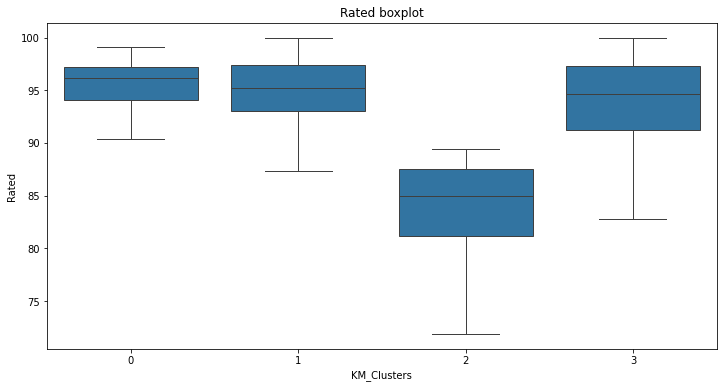

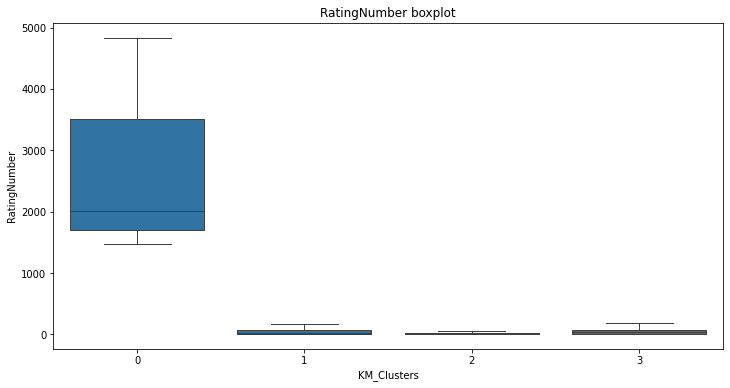

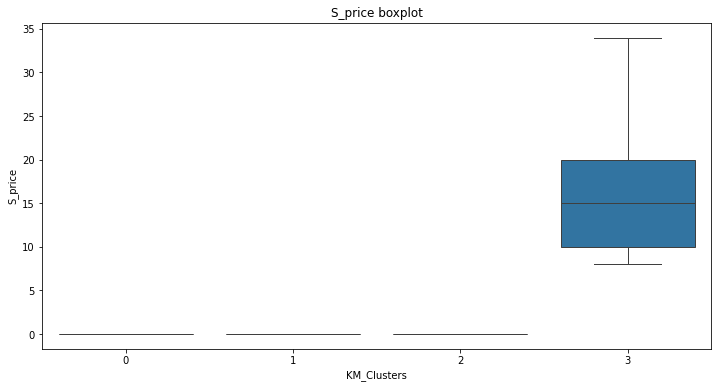

In [84]:
## Investigate the clusters

for var in cont_vars:
    fig, ax = plt.subplots(figsize=(12,6), facecolor="white")
    sns.boxplot(x="KM_Clusters", y=var, data=df, ax=ax, showfliers=False)
    plt.title(f"{var} boxplot")
    plt.show

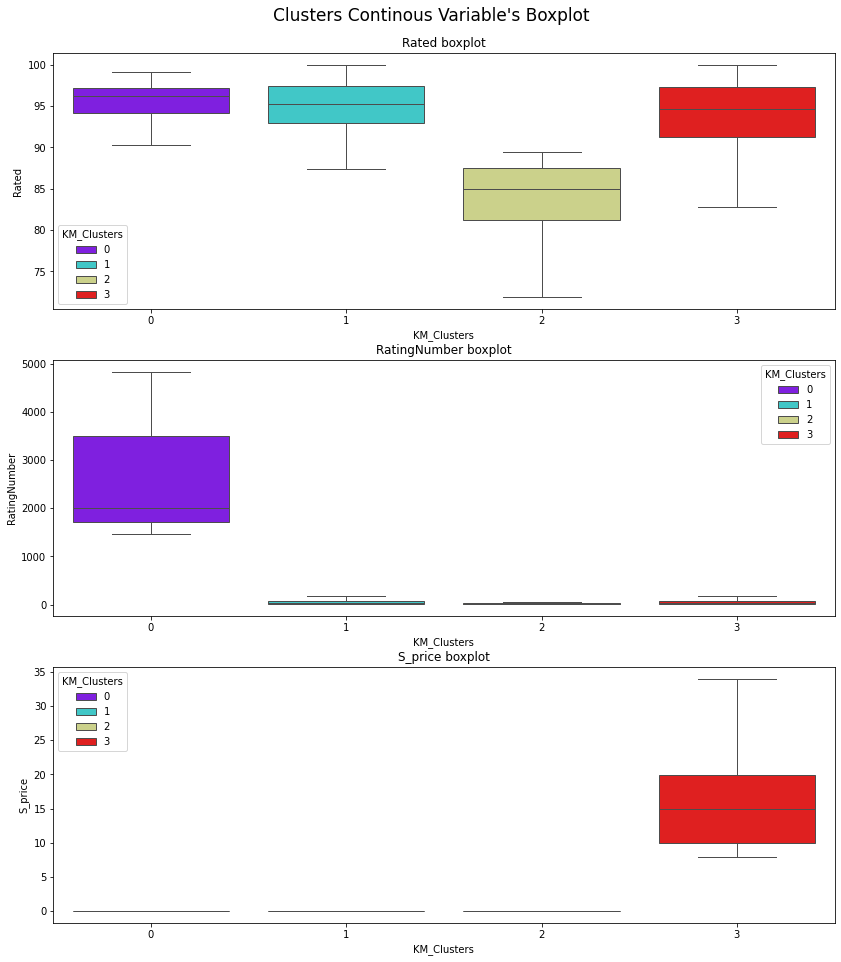

In [207]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(14,16), facecolor="white")

axis = [ax0, ax1, ax2]

for var,j in zip(cont_vars, axis):
    sns.boxplot(x="KM_Clusters", y=var, data=df, ax=j, showfliers=False, hue="KM_Clusters", palette="rainbow")
    j.title.set_text(f"{var} boxplot")
    plt.show

plt.suptitle("Clusters Continous Variable's Boxplot", fontsize=17, y=0.92)
fig.savefig('Cluster_Analysis_1.png')

In [ ]:
# Placing the plots in the plane
plot1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
plot2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 0), rowspan=2)



In [249]:
df_1 = df.copy()

df_1["count"] = 1

# Convert to mean
df_pivot = df_1.groupby("KM_Clusters").agg(mean_price=("S_price","mean"),
                                      mean_rated=("Rated","mean"),
                                      mean_RatingNumber=("RatingNumber","mean"),
                                      std_price=("S_price","std"),
                                      std_rated=("Rated","std"),
                                      std_RatingNumber=("RatingNumber","std"),
                                      Count=("count","sum")).round(2).reset_index()

## Generate Coefficient of Variation
df_pivot["CV_price"] = round((df_pivot["std_price"] / df_pivot["mean_price"]) * 100,2)
df_pivot["CV_rated"] = round((df_pivot["std_rated"] / df_pivot["mean_rated"]) * 100,2)
df_pivot["CV_RatingNumber"] = round((df_pivot["std_RatingNumber"] / df_pivot["mean_RatingNumber"]) * 100,2)

## Count the percentages
df_pivot["Composition"] = round((df_pivot["Count"] / df_pivot["Count"].sum()) * 100,2)
#df_pivot.drop("Count")
df_pivot

,KM_Clusters,mean_price,mean_rated,mean_RatingNumber,std_price,std_rated,std_RatingNumber,Count,CV_price,CV_rated,CV_RatingNumber,Composition
0,0,2.14,95.58,2744.86,5.41,2.36,1665.28,43,252.80,2.47,60.67,0.47
1,1,0.40,95.20,79.75,1.39,2.96,146.78,6687,347.50,3.11,184.05,73.27
2,2,0.71,83.43,31.20,2.14,5.44,48.53,1798,301.41,6.52,155.54,19.70
3,3,17.01,93.82,80.86,12.44,4.82,136.88,598,73.13,5.14,169.28,6.55


In [250]:
df_p = df_pivot.drop(columns=['std_price', 'std_rated', 'std_RatingNumber', "Count"], axis=1)

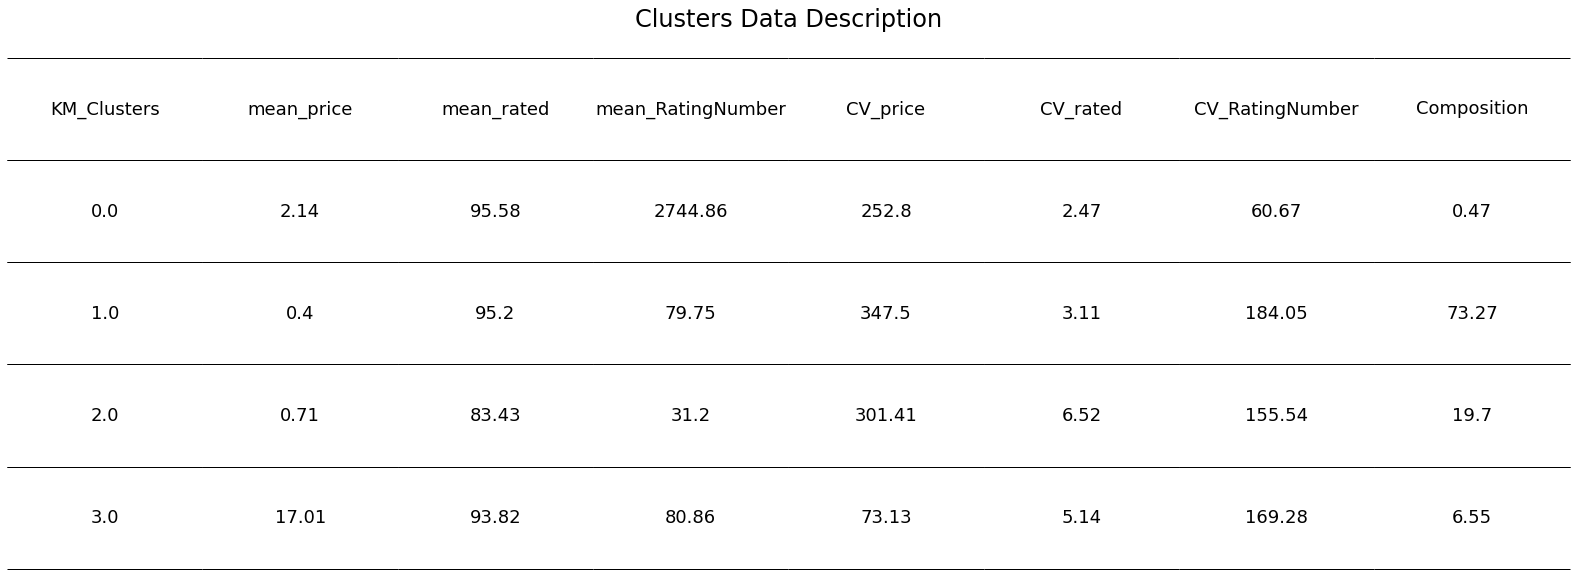

In [254]:
# Plot the DataFrame
fig, ax = plt.subplots(figsize=(22,8), facecolor="white")
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_p.values, colLabels=df_p.columns, cellLoc='center', loc='center', edges="horizontal", colWidths=[0.2 for x in df_p.columns], 
         bbox=[0.0, -0.1, 1.0, 1.0])

fig.tight_layout()

fig.suptitle("Clusters Data Description", fontsize=24)
table.auto_set_font_size(False)
table.set_fontsize(18)
# Save the plot as a PNG
plt.savefig("cluster_table.png")

In [83]:
# Convert to mean
df_pivot = df.groupby("KM_Clusters").agg(median_price=("S_price","median"),
                                      median_rated=("Rated","median"),
                                      median_RatingNumber=("RatingNumber","median"),
                                      mean_price=("S_price","mean"),
                                      mean_rated=("Rated","mean"),
                                      mean_RatingNumber=("RatingNumber","mean")).reset_index()

## Count the publisher class 
df_1 = df.copy()

df_1["count"] = 1

df_pivot1 = pd.pivot_table(df_1, values='count', index='KM_Clusters', columns='Genre',
                          aggfunc='count', fill_value=0).reset_index(drop=False)

# Sum the games count
Class_vars = df_1["Genre"].unique().tolist()
df_pivot1["Count"] = df_pivot1[Class_vars].sum(axis=1)

df_p = df_pivot.merge(df_pivot1, on="KM_Clusters", how="inner")

In [87]:
df_p

,KM_Clusters,median_price,median_rated,median_RatingNumber,mean_price,mean_rated,mean_RatingNumber,Action,Adventure,Card Game,Comic,Educational,Fighting,Interactive Fiction,Platformer,Puzzle,Racing,Rhythm,Role Playing,Shooter,Simulation,Sports,Strategy,Survival,Tool,Unknown,Visual Novel,Count
0,0,0.00,96.16588,2007.0,2.138140,95.580590,2744.860465,2,4,1,0,0,0,4,1,2,0,1,4,1,3,0,1,0,1,5,13,43
1,1,0.00,95.23810,27.0,0.401790,95.195575,79.750411,781,686,122,279,18,23,273,728,695,14,177,225,174,159,10,333,93,606,270,1021,6687
2,2,0.00,85.00000,14.0,0.712555,83.425268,31.196329,210,218,89,26,4,5,23,165,135,4,79,112,91,91,3,298,37,66,84,58,1798
3,3,14.99,94.66667,32.0,17.014187,93.824498,80.859532,67,103,7,4,0,1,8,42,28,2,4,54,25,31,0,37,2,97,12,74,598


<h4>Genre analysis</h4>

In [232]:
## Count the publisher class 
df_1 = df.copy()

df_1["count"] = 1

df_pivot1 = pd.pivot_table(df_1, values='count', index='KM_Clusters', columns='Genre',
                          aggfunc='sum', fill_value=0).reset_index(drop=False)

# Sum the games count
list1 = df_1["Genre"].unique().tolist()
df_pivot1["Sum"] = df_pivot1[list1].sum(axis=1)

## List the tag vars

for i in list1:
    df_pivot1[i] = round((df_pivot1[i]/df_pivot1["Sum"])*100,2)

df_pivot1 = df_pivot1.drop('Sum', axis=1)

df_pivot1

Genre,KM_Clusters,Action,Adventure,Card Game,Comic,Educational,Fighting,Interactive Fiction,Platformer,Puzzle,Racing,Rhythm,Role Playing,Shooter,Simulation,Sports,Strategy,Survival,Tool,Unknown,Visual Novel
0,0,4.65,9.30,2.33,0.00,0.00,0.00,9.30,2.33,4.65,0.00,2.33,9.30,2.33,6.98,0.00,2.33,0.00,2.33,11.63,30.23
1,1,11.68,10.26,1.82,4.17,0.27,0.34,4.08,10.89,10.39,0.21,2.65,3.36,2.60,2.38,0.15,4.98,1.39,9.06,4.04,15.27
2,2,11.68,12.12,4.95,1.45,0.22,0.28,1.28,9.18,7.51,0.22,4.39,6.23,5.06,5.06,0.17,16.57,2.06,3.67,4.67,3.23
3,3,11.20,17.22,1.17,0.67,0.00,0.17,1.34,7.02,4.68,0.33,0.67,9.03,4.18,5.18,0.00,6.19,0.33,16.22,2.01,12.37


In [233]:
list1 = df_pivot1["KM_Clusters"].unique().tolist()

## Split and transpose the dataframe
for i in list1:
    new_df = df_pivot1[df_pivot1["KM_Clusters"]==i]
    new_df = new_df.drop("KM_Clusters",axis=1)
    new_df = new_df.T.sum(axis=1)
    new_df = pd.DataFrame(new_df).reset_index()
    new_df.columns = ["Genre","Percentage"]
    new_df = new_df.sort_values(by="Percentage", ascending=False)
    new_df = new_df.head(3)
    exec(f"df_p{i} = pd.DataFrame(new_df)")

In [234]:
df_p0

,Genre,Percentage
19,Visual Novel,30.23
18,Unknown,11.63
11,Role Playing,9.30


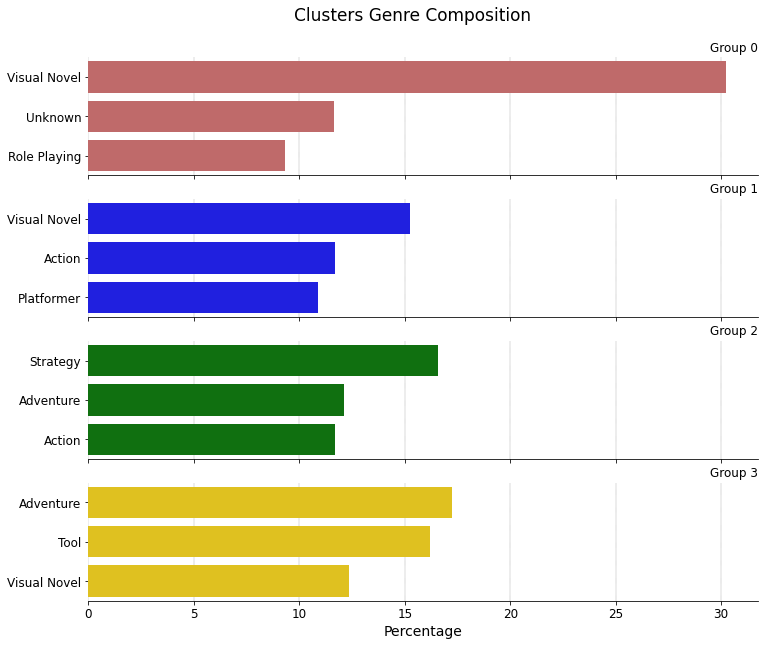

In [236]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(12,10), sharex=True, facecolor="white")

dflist = [df_p0, df_p1, df_p2, df_p3]
axlist = [ax0, ax1, ax2, ax3]
color_list = ["indianred","blue","green","gold"]

for i,d,x,c in zip(list1, dflist, axlist, color_list):
    sns.barplot(x="Percentage", y="Genre", data=d, ax=x, color=c, zorder=10)
    x.set_title('Group '+str(i), fontsize=12, loc="right")
    x.set_ylabel("")
    x.tick_params(axis="y", labelsize=12)
    ## Aesthetic
    x.spines['top'].set_visible(False)
    x.spines['right'].set_visible(False)
    x.spines['left'].set_visible(False)
    x.grid(linewidth=0.2, axis="x", linestyle="--", color="black", zorder=0)    

plt.tick_params(axis="x", labelsize=12)
plt.xlabel("Percentage", fontsize=14)
plt.suptitle("Clusters Genre Composition", fontsize=17, y=0.95)
fig.savefig('Cluster_Analysis_2.png')

Insights: 
- Group 0: A large portion of cluster 0, the top market performing group, is made up from visual novel group (30%). Below visual novel, the top 2 genre are unknown/unspecified and Role Playing.
- Group 1: Group 1 top genres are pretty common, which are visual novel, action, and platformer. Since group 1 is the highly rated but has an average user review count, then the genre composition reflects more on the typical itch.io popular products.
- Group 2: Group 2 is a relatively low market performing product compared to others. Its top 3 genre are strategy, adventure, and action. Prementioned top genres composition is pretty uncommon compared to another group, which can signify that group 3 are mostly made up of alternative genre.
- Group 3: The top 3 genre are adventure, tool, and visual novel. Since group 3 is made up of expensive products, it can be inferred that the products in prementioned genres are highly budget products version of their genre.

#### Platform analysis

In [154]:
#Explode the tool tags
all_tags = df["Platforms"].str.split(', ').apply(pd.Series).stack()
dummies = pd.get_dummies(all_tags).groupby(level=0).sum()

list_tags = all_tags.unique()
list_tags =  sorted(list_tags)
first = list_tags[0]
last = list_tags[-1]

dummies = dummies.loc[:,first:last].astype(int)

# Combine with dataframe with the Cluster Column 
d1 = dfc[["KM_Clusters"]]
df_t = d1.join(dummies, how="left")
df_t

,KM_Clusters,Android,Flash,HTML5,Linux,SKIP,Unity,Unknown,Windows,macOS
0,0,0,0,1,1,0,0,0,1,1
1,0,0,0,1,1,0,0,0,1,1
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
9121,2,0,0,1,0,0,0,0,0,0
9122,1,0,0,1,1,0,0,0,1,1
9123,1,0,0,0,1,0,0,0,1,0
9124,1,0,0,1,0,0,0,0,0,0


In [155]:
## Pivot the dataframe
# Add Count 
## Count the publisher class 
df_t["count"] = 1

df_pivot = df_t.groupby("KM_Clusters").sum().loc[:,first:"count"].reset_index()

# Divide tags value by count
for i in list_tags:
    df_pivot[i] = (df_pivot[i]/df_pivot["count"])*100

df_pivot

,KM_Clusters,Android,Flash,HTML5,Linux,SKIP,Unity,Unknown,Windows,macOS,count
0,0,13.953488,0.000000,39.534884,58.139535,0.000000,0.000000,2.325581,76.744186,69.767442,43
1,1,5.548078,0.254225,42.455511,28.009571,0.104681,0.059818,11.484971,63.556154,33.617467,6687
2,2,5.061179,0.278087,49.443826,28.197998,0.166852,0.333704,5.172414,68.631813,34.649611,1798
3,3,4.347826,0.000000,1.170569,48.160535,0.334448,0.000000,12.207358,86.622074,58.695652,598


Text(0.5, 1.0, 'Top 3 Game Tool by Percentage')

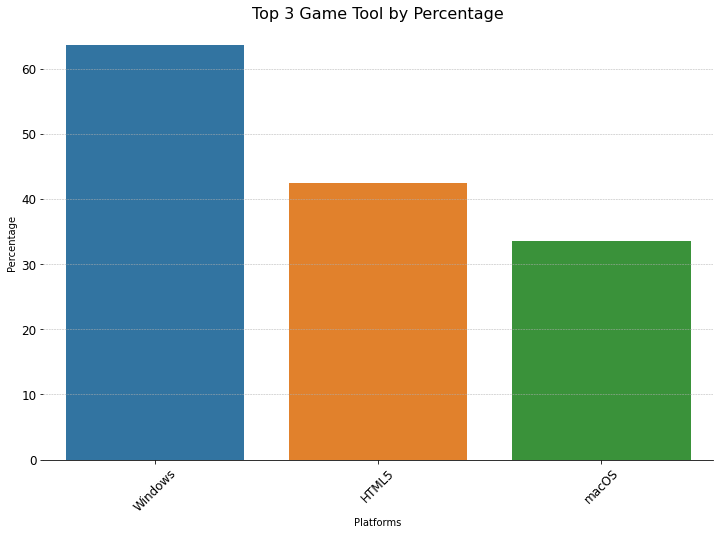

In [157]:
## What it the most popular platform?
df_p1 = df_pivot[df_pivot["KM_Clusters"]==1]
df_p1 = df_p1.loc[:,first:last]

# Transpose the axis so that the column name become row
# Count the total sum of each columns
pivot1 = df_p1.T.sum(axis=1)
pivot1 = pd.DataFrame(pivot1).reset_index()
pivot1.columns = ["Platforms","Percentage"]
pivot1 = pivot1.sort_values(by="Percentage", ascending=False)
pivot1 = pivot1.head(3)

## Make Bar Plot
fig, ax = plt.subplots(figsize=(12,8), facecolor='white')

sns.barplot(x = "Platforms", y = "Percentage", data=pivot1, hue="Platforms", ax=ax)

## Aesthethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

plt.title("Top 3 Game Tool by Percentage", fontsize=16)